In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import statistics  as stats 

import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize']=[12,6]

In [3]:
df_sales = pd.read_csv('C:/Users/samyak jain/Desktop/interim report/train.csv')
df_sales.head()
df_sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_sales.shape

(550068, 12)

In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df_sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df_sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
## No imputation required in Product_category 1 and product category 2

# UNIVARIATE ANALYSIS

In [9]:
df_sales['User_ID'].nunique()

5891

In [10]:
df_sales['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1005391       7
1002690       7
1002111       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [11]:
df_sales[df_sales['User_ID'].duplicated().sort_values()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [12]:
## Inference : User ID has 5891 unique values and some  duplicate values

In [13]:
df_sales['Product_ID'].nunique()

3631

In [14]:
df_sales['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00206242       1
P00185942       1
P00144942       1
P00135942       1
P00149742       1
Name: Product_ID, Length: 3631, dtype: int64

In [15]:
df_sales[df_sales['Product_ID'].duplicated().sort_values()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
121,1000023,P00313042,M,36-45,0,B,3,1,5,14.0,NaN,5183
126,1000024,P00248942,F,26-35,7,A,3,1,1,6.0,14.0,15774
136,1000026,P00346642,M,26-35,7,B,2,1,8,NaN,NaN,7814
149,1000028,P00118742,F,26-35,1,C,2,1,5,11.0,NaN,8690
159,1000031,P00117442,M,55+,7,C,2,0,5,14.0,NaN,8596
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [16]:
## Inference - Product ID has 3631 unique values and some duplicated values also

In [17]:
df_sales['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

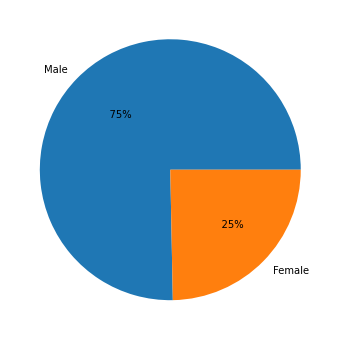

In [18]:
plt.pie(df_sales['Gender'].value_counts(),labels=['Male','Female'],autopct= '%6.f%%')
plt.show()

In [19]:
## It shows that the number of males are 75% and the females are 25 %

In [20]:
df_sales['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

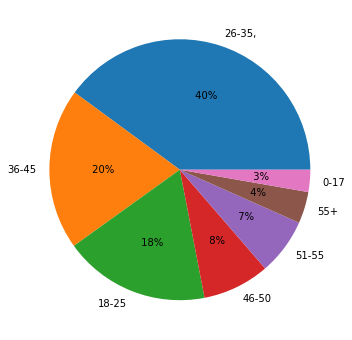

In [21]:
plt.pie(df_sales['Age'].value_counts(),labels=['26-35,','36-45','18-25','46-50','51-55','55+','0-17'],autopct='%3.f%%')
plt.show()

In [22]:
## Inference : 40% of the population belongs to 26-35 age group

In [23]:
value = df_sales['Occupation'].value_counts

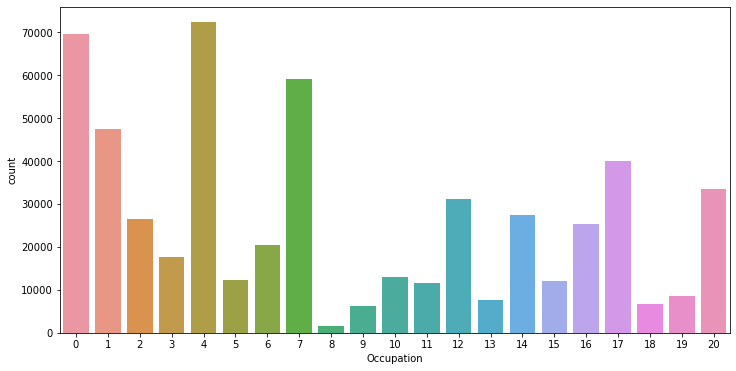

In [24]:
sns.countplot(df_sales['Occupation'] )
plt.show()

In [25]:
## Inference : Most of the person has 4 occupation and followed by 0

In [26]:
df_sales['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

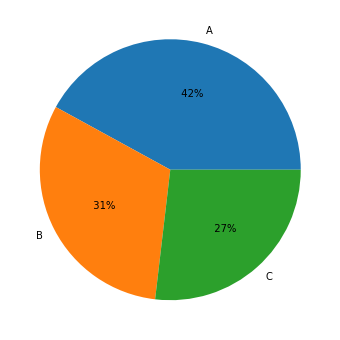

In [27]:
plt.pie(df_sales['City_Category'].value_counts(),labels=['A','B','C'],autopct='%4.f%%')
plt.show()

In [28]:
## Inference : Maximum 42% belongs to city category A

In [29]:
df_sales['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [30]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

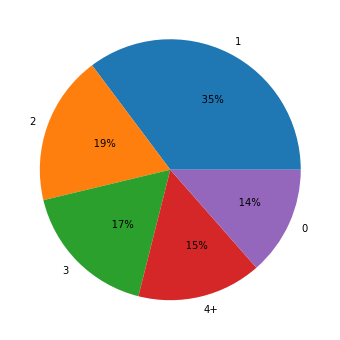

In [31]:
plt.pie(df_sales['Stay_In_Current_City_Years'].value_counts(),labels=['1','2','3','4+','0'],autopct='%7.f%%')
plt.show()

In [32]:
## Inference : 35% of the people of the total population belongs to current city since last year

In [33]:
df_sales['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [34]:
## O belong to unmarried
## 1 belong to married

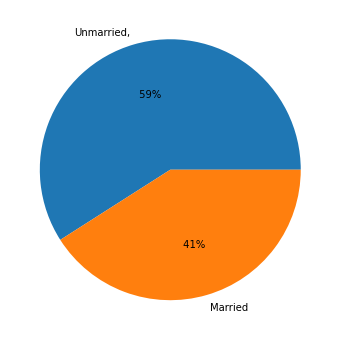

In [35]:
plt.pie(df_sales['Marital_Status'].value_counts(),labels=['Unmarried,','Married'],autopct='%3.f%%')
plt.show()

In [36]:
## Inference : unmarried person has the majority i.e. 59% of the total population


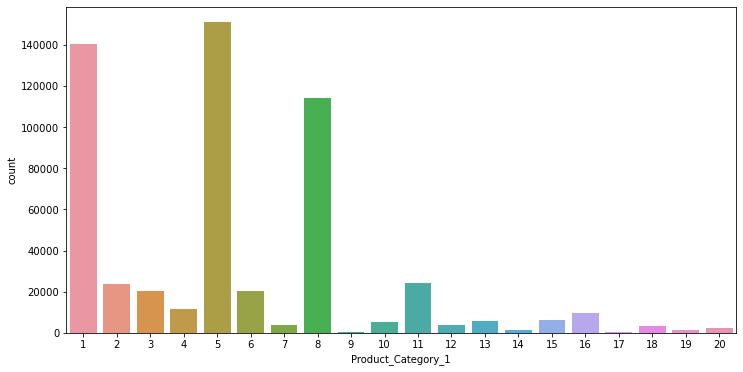

In [37]:
sns.countplot(df_sales['Product_Category_1'])
plt.show()

In [38]:
## Inference :Product Cateogry 1,item no:5  has the maximum demand in market and item no: 9 has the least demand in the market

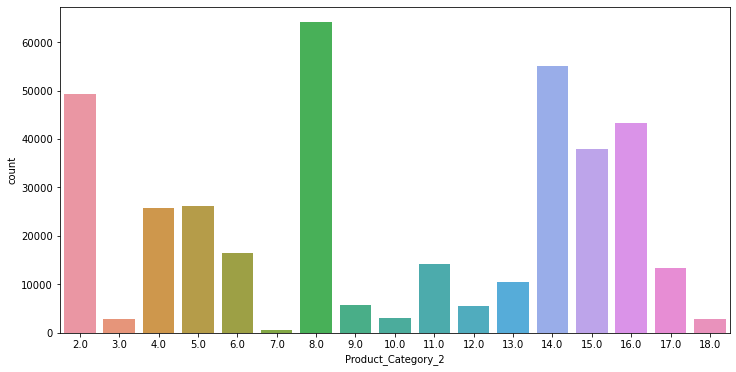

In [39]:
sns.countplot(df_sales['Product_Category_2'])
plt.show()

In [40]:
## Inference : Product Cateogry 2,item no:8  has the maximum demand in market and item no: 7 has the least demand in the market

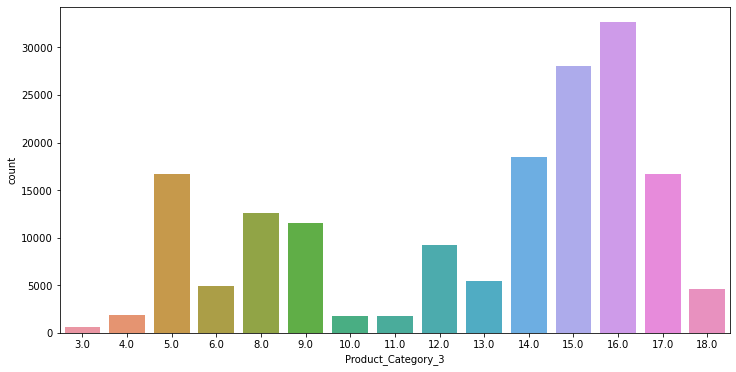

In [41]:
sns.countplot(df_sales['Product_Category_3'])
plt.show()

In [42]:
## Inference : Product Cateogry 3,item no:16  has the maximum demand in market and item no: 3 has the least demand in the market

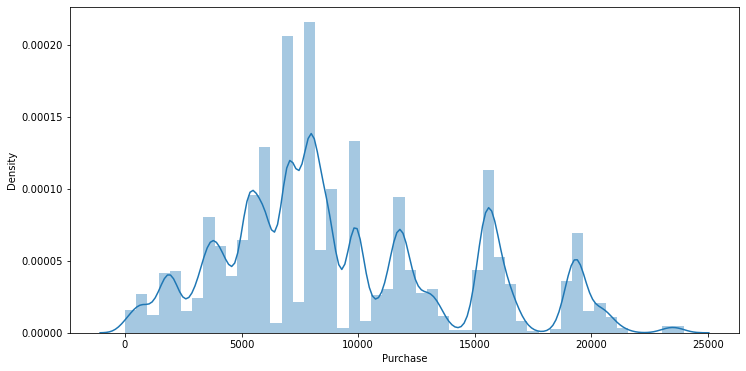

In [43]:
sns.distplot(df_sales['Purchase'])
plt.show()

In [44]:
## Inference : Maximum purchase ranges from 5000 to 10000 values

# BIVARIATE ANALYSIS

# Relation B/w User id and others

In [45]:
a =pd.crosstab(df_sales['User_ID'],['Product_ID'])
a

col_0,Product_ID
User_ID,
1000001,35
1000002,77
1000003,29
1000004,14
1000005,106
...,...
1006036,514
1006037,122
1006038,12


In [46]:
a.idxmax()

col_0
Product_ID    1001680
dtype: int64

In [47]:
a.max()

col_0
Product_ID    1026
dtype: int64

In [48]:
## Inference :- Product ID 1001680 has the maximum purchase i.e. 1026 times

In [49]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [50]:
b=pd.crosstab(df_sales['User_ID'],df_sales['Gender'])
b

Gender,F,M
User_ID,,
1000001,35,0
1000002,0,77
1000003,0,29
1000004,0,14
1000005,0,106
...,...,...
1006036,514,0
1006037,122,0
1006038,12,0


In [51]:
b.idxmax()

Gender
F    1001150
M    1001680
dtype: int64

In [52]:
b.max()

Gender
F     752
M    1026
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='User_ID'>

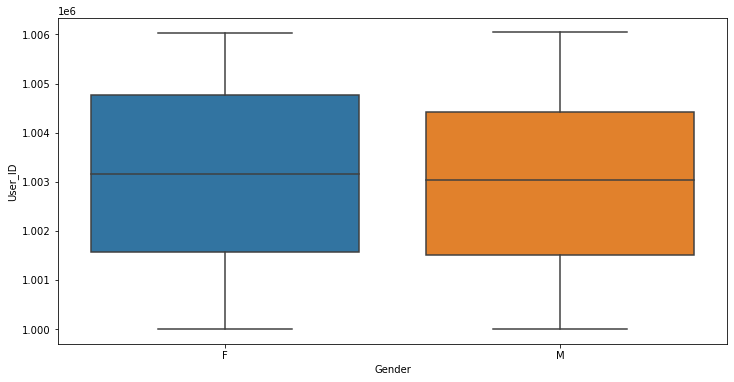

In [53]:
sns.boxplot(df_sales['Gender'],df_sales['User_ID'])

In [54]:
## Inference : Female has more proportion in user_id than males
## Among females user - 1001150 has the maximum number of purchase i.e. 752 times
## Among Male user - 1001680 has the maximum number of purchase i.e. 1026 times

In [55]:
c =pd.crosstab(df_sales['User_ID'],df_sales['Age'])
c

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
User_ID,,,,,,,
1000001,35,0,0,0,0,0,0
1000002,0,0,0,0,0,0,77
1000003,0,0,29,0,0,0,0
1000004,0,0,0,0,14,0,0
1000005,0,0,106,0,0,0,0
...,...,...,...,...,...,...,...
1006036,0,0,514,0,0,0,0
1006037,0,0,0,0,122,0,0
1006038,0,0,0,0,0,0,12


In [56]:
c.idxmax()

Age
0-17     1001088
18-25    1003391
26-35    1001680
36-45    1004277
46-50    1000889
51-55    1003292
55+      1003618
dtype: int64

In [57]:
c.max()

Age
0-17      680
18-25     698
26-35    1026
36-45     979
46-50     823
51-55     502
55+       767
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='User_ID'>

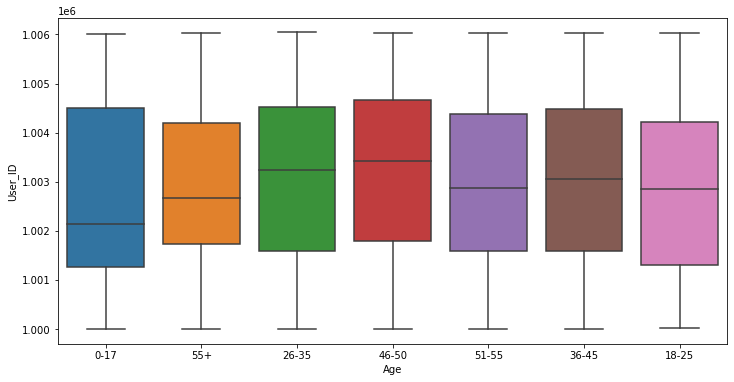

In [58]:
sns.boxplot(df_sales['Age'],df_sales['User_ID'])

In [59]:
## Inference :- Most of the user are from age group of 0-17
##

In [60]:
d =pd.crosstab(df_sales['User_ID'],df_sales['Occupation'])
d

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,77,0,0,0,0
1000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,29,0,0,0,0,0
1000004,0,0,0,0,0,0,0,14,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,514,0,0,0,0,0
1006037,0,122,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1006038,0,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
d.idxmax()

Occupation
0     1001010
1     1005795
2     1004543
3     1001015
4     1002063
5     1004447
6     1000549
7     1001181
8     1000550
9     1002529
10    1001088
11    1005954
12    1002304
13    1000216
14    1003224
15    1006036
16    1004277
17    1001941
18    1003841
19    1004227
20    1001680
dtype: int64

In [62]:
d.max()

Occupation
0      575
1      729
2      588
3      740
4      709
5      560
6      632
7      862
8      549
9      450
10     680
11     557
12     494
13     430
14     622
15     514
16     979
17     898
18     698
19     676
20    1026
dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='User_ID'>

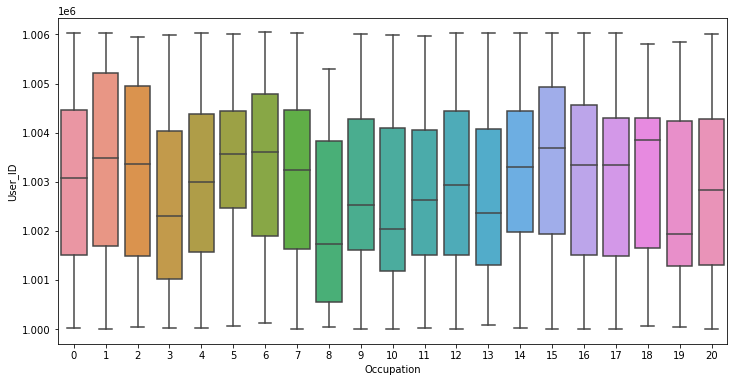

In [63]:
sns.boxplot(df_sales['Occupation'],df_sales['User_ID'])

In [64]:
## inference :- Occupation 5 has minimum number of user id

In [65]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [66]:
e= pd.crosstab(df_sales['User_ID'],df_sales['City_Category'])
e

City_Category,A,B,C
User_ID,,,
1000001,35,0,0
1000002,0,0,77
1000003,29,0,0
1000004,0,14,0
1000005,106,0,0
...,...,...,...
1006036,0,514,0
1006037,0,0,122
1006038,0,0,12


In [67]:
e.idxmax()

City_Category
A    1001680
B    1004447
C    1001053
dtype: int64

In [68]:
e.max()

City_Category
A    1026
B     560
C     210
dtype: int64

<AxesSubplot:xlabel='City_Category', ylabel='User_ID'>

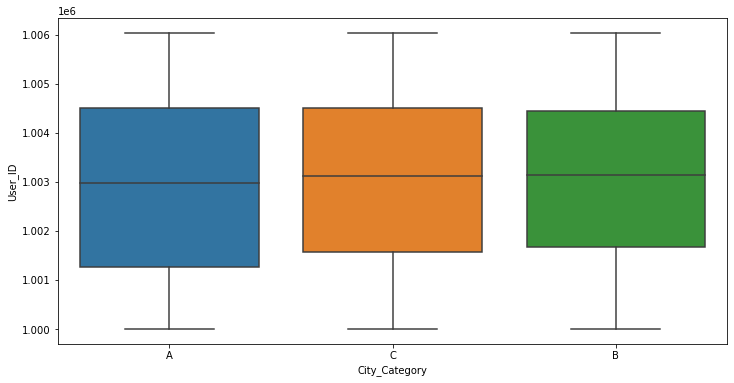

In [69]:
sns.boxplot(df_sales['City_Category'],df_sales['User_ID'])

In [70]:
## Inference :- City Category A has more number of user ID.

In [71]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [72]:
f = pd.crosstab(df_sales['User_ID'],df_sales['Stay_In_Current_City_Years'])
f

Stay_In_Current_City_Years,0,1,2,3,4+
User_ID,,,,,
1000001,0,0,35,0,0
1000002,0,0,0,0,77
1000003,0,0,0,29,0
1000004,0,0,14,0,0
1000005,0,106,0,0,0
...,...,...,...,...,...
1006036,0,0,0,0,514
1006037,0,0,0,0,122
1006038,0,0,12,0,0


In [73]:
f.idxmax()

Stay_In_Current_City_Years
0     1004277
1     1001941
2     1005831
3     1001680
4+    1003618
dtype: int64

In [74]:
f.max()

Stay_In_Current_City_Years
0      979
1      898
2      727
3     1026
4+     767
dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='User_ID'>

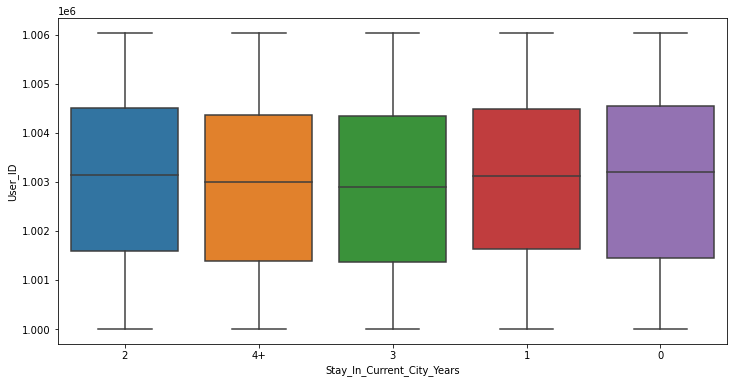

In [75]:
sns.boxplot(df_sales['Stay_In_Current_City_Years'],df_sales['User_ID'])

In [76]:
## Inference:- All have almost the same number of User ID. There is no effect of stay in current city years on user id

In [77]:
g =pd.crosstab(df_sales['User_ID'],df_sales['Marital_Status'])
g

Marital_Status,0,1
User_ID,,
1000001,35,0
1000002,77,0
1000003,29,0
1000004,0,14
1000005,0,106
...,...,...
1006036,0,514
1006037,122,0
1006038,12,0


In [78]:
g.idxmax()

Marital_Status
0    1004277
1    1001680
dtype: int64

In [79]:
g.max()

Marital_Status
0     979
1    1026
dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='User_ID'>

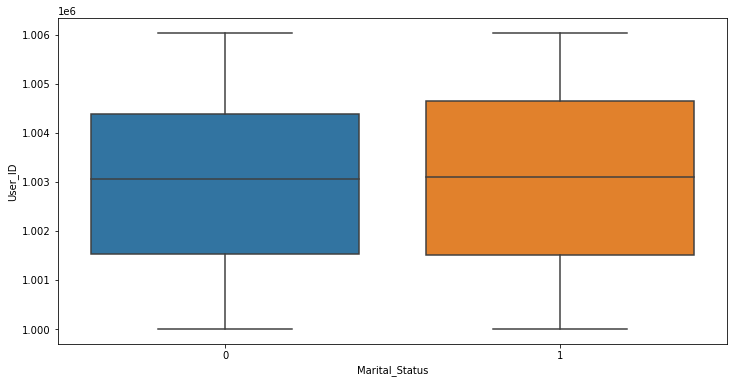

In [80]:
sns.boxplot(df_sales['Marital_Status'],df_sales['User_ID'],)

In [81]:
## Inference :- Married person has more user_id as compared to unmarried

In [82]:
u1 =pd.crosstab(df_sales['User_ID'],df_sales['Product_Category_1'])
u1

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
User_ID,,,,,,,,,,,,,,,,,,,,
1000001,4,1,11,2,2,1,0,8,0,0,0,3,0,1,0,1,0,0,0,1
1000002,31,1,0,0,13,6,0,25,0,0,0,0,0,0,0,0,0,0,0,1
1000003,15,2,1,0,9,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1000004,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1000005,18,2,1,3,20,6,5,44,0,0,2,0,0,1,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,86,15,13,15,129,20,7,159,0,5,32,2,5,2,12,9,0,2,0,1
1006037,14,2,0,1,26,7,0,44,0,3,4,0,5,1,3,11,0,1,0,0
1006038,0,0,2,0,5,0,0,4,0,0,0,0,0,0,0,0,0,0,0,1


In [83]:
u1.idxmax()

Product_Category_1
1     1004277
2     1001941
3     1001120
4     1004048
5     1001680
6     1004277
7     1001242
8     1004277
9     1000017
10    1000889
11    1001017
12    1001150
13    1000889
14    1000889
15    1000563
16    1004277
17    1001667
18    1001667
19    1000008
20    1000001
dtype: int64

In [84]:
u1.max()

Product_Category_1
1     209
2      53
3      44
4      41
5     273
6      49
7      23
8     276
9       1
10     13
11    124
12     17
13     19
14     15
15     22
16     38
17      5
18     16
19      1
20      1
dtype: int64

<AxesSubplot:xlabel='Product_Category_1', ylabel='User_ID'>

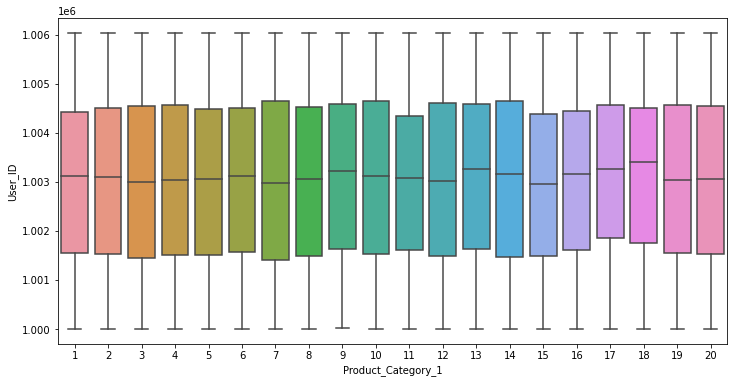

In [85]:
sns.boxplot(df_sales['Product_Category_1'],df_sales['User_ID'])

In [86]:
## Inference :-  Product 7 in Product category 1 has the highest count of user id among all the products

In [87]:
p2 =pd.crosstab(df_sales['User_ID'],df_sales['Product_Category_2'])
p2

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
User_ID,,,,,,,,,,,,,,,,,
1000001,2,0,11,0,1,0,4,0,0,0,0,0,1,1,0,1,0
1000002,8,0,0,2,2,0,18,0,0,2,0,1,5,5,10,1,0
1000003,13,0,1,3,0,0,3,0,0,0,0,0,1,0,1,0,1
1000004,4,0,0,0,1,0,2,0,0,1,0,0,0,3,1,0,0
1000005,3,1,1,5,2,0,11,0,0,3,1,4,11,4,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,29,1,15,18,13,1,56,5,5,10,5,9,61,45,35,10,1
1006037,3,0,1,1,6,0,14,1,2,0,0,3,11,9,17,6,0
1006038,0,0,0,2,0,0,2,0,0,1,0,0,4,0,0,0,0


In [88]:
p2.idxmax()

Product_Category_2
2.0     1002088
3.0     1003675
4.0     1001680
5.0     1001941
6.0     1004812
7.0     1000149
8.0     1001150
9.0     1004447
10.0    1001053
11.0    1001017
12.0    1003526
13.0    1000889
14.0    1000889
15.0    1000563
16.0    1004277
17.0    1000889
18.0    1001667
dtype: int64

In [89]:
p2.max()

Product_Category_2
2.0      65
3.0       9
4.0      67
5.0      56
6.0      31
7.0       3
8.0     109
9.0      11
10.0      8
11.0     34
12.0     24
13.0     30
14.0    146
15.0     69
16.0    100
17.0     35
18.0     10
dtype: int64

<AxesSubplot:xlabel='Product_Category_2', ylabel='User_ID'>

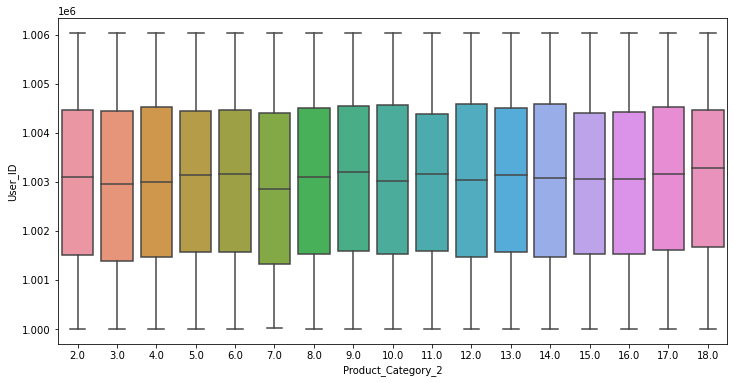

In [90]:
sns.boxplot(df_sales['Product_Category_2'],df_sales['User_ID'])

In [91]:
## Inference :- Product 11 in Product category 2 has the least count among all the products in product category 2

In [92]:
p3 = pd.crosstab(df_sales['User_ID'],df_sales['Product_Category_3'])
p3

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
User_ID,,,,,,,,,,,,,,,
1000001,0,0,3,0,1,2,0,0,5,0,1,0,1,1,0
1000002,0,0,0,1,3,1,1,0,0,2,5,2,4,6,1
1000003,0,0,3,0,2,0,0,2,0,0,2,1,1,0,2
1000004,0,0,0,0,0,1,0,1,0,0,2,2,2,1,0
1000005,0,0,1,1,2,0,1,0,1,0,1,1,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,1,0,5,2,6,4,1,1,3,3,18,31,26,6,3
1006037,0,0,0,0,4,3,0,0,1,2,5,3,11,4,0
1006038,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0


In [93]:
p3.idxmax()

Product_Category_3
3.0     1000195
4.0     1000563
5.0     1001941
6.0     1000524
8.0     1001941
9.0     1002454
10.0    1001404
11.0    1003807
12.0    1001941
13.0    1001150
14.0    1000889
15.0    1002088
16.0    1001680
17.0    1000889
18.0    1001181
dtype: int64

In [94]:
p3.max()

Product_Category_3
3.0      3
4.0      8
5.0     26
6.0      8
8.0     19
9.0     19
10.0     4
11.0     6
12.0    21
13.0    11
14.0    48
15.0    37
16.0    54
17.0    24
18.0    11
dtype: int64

<AxesSubplot:xlabel='Product_Category_3', ylabel='User_ID'>

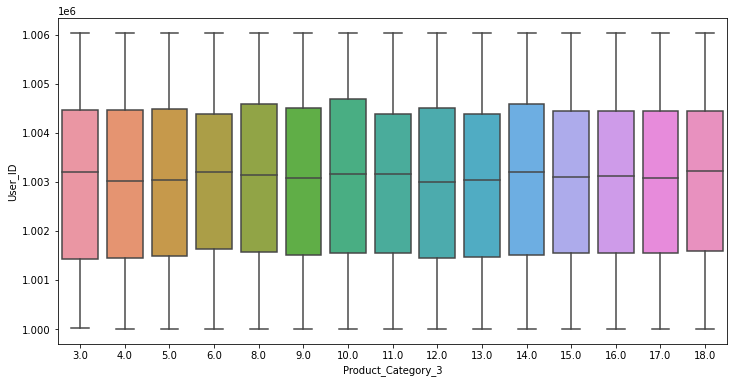

In [95]:
sns.boxplot(df_sales['Product_Category_3'],df_sales['User_ID'])

In [96]:
## Inference :- Product 10 in Product category 3 has the maximum count among all the products in this category

In [97]:
X = df_sales.groupby('User_ID')['Purchase'].mean().sort_values(ascending= True)
X

User_ID
1004486     2318.733333
1003598     2698.357143
1002744     3421.521739
1005944     3599.733333
1004636     3612.812500
               ...     
1003461    17508.700000
1001349    18162.739130
1005999    18345.944444
1005069    18490.166667
1003902    18577.893617
Name: Purchase, Length: 5891, dtype: float64

In [98]:
X.idxmax()

1003902

In [99]:
X.max()

18577.893617021276

In [100]:
X.idxmin()

1004486

In [101]:
X.min()

2318.733333333333

# Relation between Product Id and other variables

In [102]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [103]:
pd.crosstab(index = df_sales['Product_ID'],columns=df_sales['Gender'])

Gender,F,M
Product_ID,,
P00000142,347,805
P00000242,91,285
P00000342,69,175
P00000442,46,46
P00000542,50,99
...,...,...
P0099442,53,147
P0099642,4,9
P0099742,44,82


In [104]:
prod_1 = df_sales.groupby('Gender')['Product_ID'].count()
prod_1

Gender
F    135809
M    414259
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Gender'>

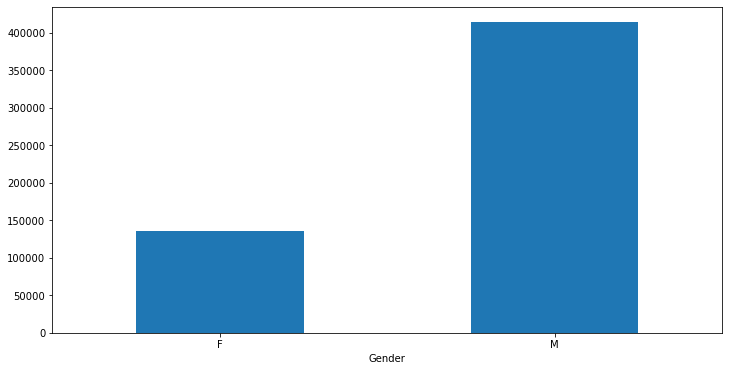

In [105]:
prod_1.plot(kind='bar',rot=0)

In [106]:
## Purchase count of male is more than the females

In [107]:
Prod_2 = pd.crosstab(index=df_sales['Product_ID'],columns=df_sales['Age'])
Prod_2

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_ID,,,,,,,
P00000142,55,259,445,228,83,57,25
P00000242,19,88,131,79,26,26,7
P00000342,11,48,95,37,15,23,15
P00000442,2,18,46,17,4,3,2
P00000542,9,33,56,33,8,9,1
...,...,...,...,...,...,...,...
P0099442,4,56,97,25,10,3,5
P0099642,0,2,6,3,0,1,1
P0099742,15,32,41,27,10,1,0


In [108]:
Prod_2.idxmax()

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

In [109]:
Prod_2.max()

Age
0-17      65
18-25    389
26-35    746
36-45    356
46-50    138
51-55    140
55+      104
dtype: int64

<AxesSubplot:xlabel='Age'>

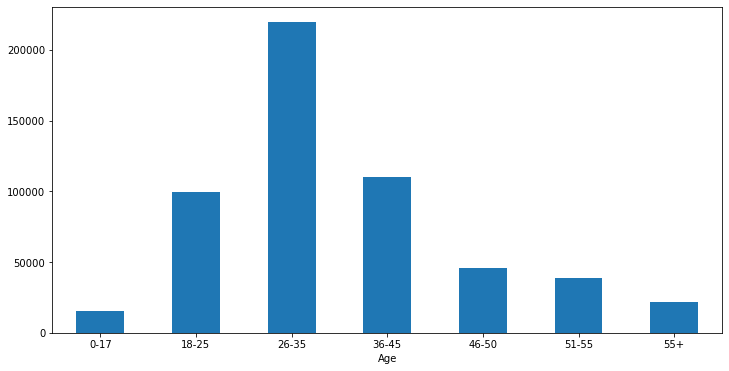

In [110]:
dm = df_sales.groupby('Age')['Product_ID'].count()
dm.plot(kind='bar',rot=0)

In [111]:
## Inference : - 26-35 age group has the maximum count in all the Product ID

In [112]:
Prod_3 = pd.crosstab(index=df_sales['Product_ID'],columns=df_sales['Occupation'])
Prod_3

Occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Product_ID,,,,,,,,,,,,,,,,,,,,,
P00000142,146,95,45,30,170,24,45,121,1,22,...,16,72,8,64,27,41,88,10,15,64
P00000242,57,32,18,9,58,9,13,38,2,2,...,5,22,1,14,7,18,27,7,6,18
P00000342,34,21,7,11,30,2,12,24,1,5,...,4,11,6,11,3,17,17,4,4,10
P00000442,14,10,3,3,15,3,5,12,0,0,...,0,7,1,3,1,2,6,0,2,4
P00000542,21,11,5,6,23,4,3,27,0,3,...,0,6,0,8,0,4,6,2,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0099442,19,16,13,7,35,2,6,24,1,1,...,7,8,0,19,6,8,11,2,3,10
P0099642,0,1,1,2,2,0,0,0,0,1,...,0,1,0,0,0,0,2,0,1,2
P0099742,19,8,5,2,21,4,5,11,1,4,...,1,5,0,3,1,4,8,1,2,7


In [113]:
Prod_3.idxmax()

Occupation
0     P00265242
1     P00265242
2     P00265242
3     P00117942
4     P00265242
5     P00265242
6     P00265242
7     P00265242
8     P00112142
9     P00034742
10    P00145042
11    P00265242
12    P00057642
13    P00265242
14    P00265242
15    P00025442
16    P00265242
17    P00057642
18    P00265242
19    P00265242
20    P00265242
dtype: object

In [114]:
Prod_3.max()

Occupation
0     206
1     159
2      86
3      50
4     287
5      38
6      72
7     193
8       8
9      26
10     65
11     42
12    131
13     42
14    110
15     50
16     79
17    149
18     25
19     34
20     91
dtype: int64

In [115]:
df = df_sales.groupby('Occupation')['Product_ID'].count()
df

Occupation
0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Occupation'>

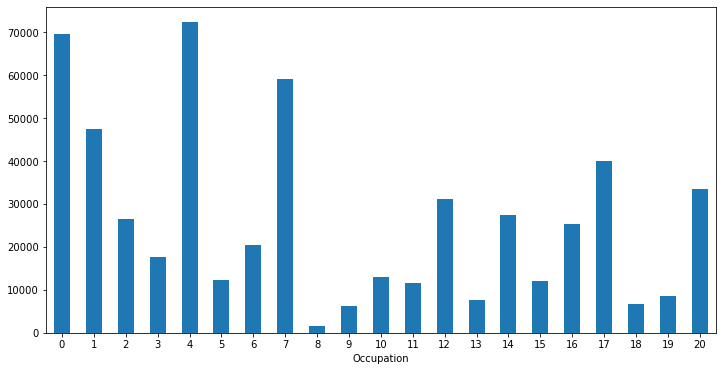

In [116]:
df.plot(kind='bar',rot=0)

In [117]:
## inference : Occupation 4 has the maximum count in Product ID

In [118]:
Prod_4 =pd.crosstab(index=df_sales['Product_ID'],columns=df_sales['City_Category'])
Prod_4

City_Category,A,B,C
Product_ID,,,
P00000142,255,435,462
P00000242,83,181,112
P00000342,64,102,78
P00000442,36,38,18
P00000542,44,70,35
...,...,...,...
P0099442,65,88,47
P0099642,4,6,3
P0099742,34,51,41


In [119]:
Prod_4.idxmax()

City_Category
A    P00265242
B    P00265242
C    P00265242
dtype: object

In [120]:
Prod_4.max()

City_Category
A    401
B    634
C    845
dtype: int64

In [121]:
df1 = df_sales.groupby('City_Category')['Product_ID'].count()
df1

City_Category
A    147720
B    231173
C    171175
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='City_Category'>

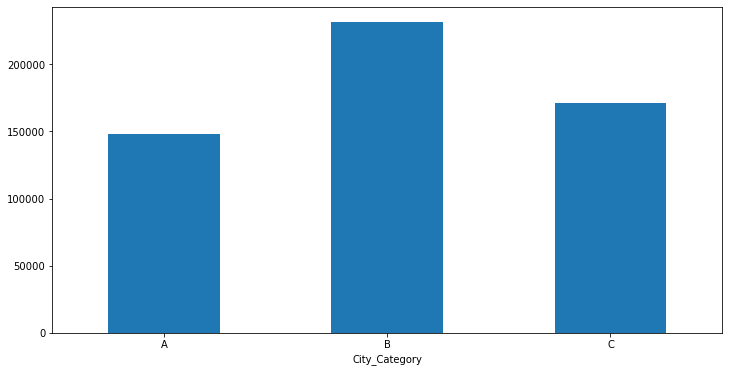

In [122]:
df1.plot(kind='bar',rot=0)

In [123]:
## City Category B has the maximum number of count of product ID among all 

In [124]:
Prod_5 =pd.crosstab(index=df_sales['Product_ID'],columns=df_sales['Stay_In_Current_City_Years'])
Prod_5

Stay_In_Current_City_Years,0,1,2,3,4+
Product_ID,,,,,
P00000142,162,425,212,197,156
P00000242,50,122,72,75,57
P00000342,31,91,54,37,31
P00000442,14,34,16,12,16
P00000542,14,49,31,29,26
...,...,...,...,...,...
P0099442,27,66,37,36,34
P0099642,1,3,2,5,2
P0099742,18,36,31,27,14


In [125]:
Prod_5.idxmax()

Stay_In_Current_City_Years
0     P00265242
1     P00265242
2     P00265242
3     P00265242
4+    P00265242
dtype: object

In [126]:
Prod_5.max()

Stay_In_Current_City_Years
0     244
1     678
2     368
3     318
4+    272
dtype: int64

In [127]:
df2 = df_sales.groupby('Stay_In_Current_City_Years')['Product_ID'].count()
df2

Stay_In_Current_City_Years
0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

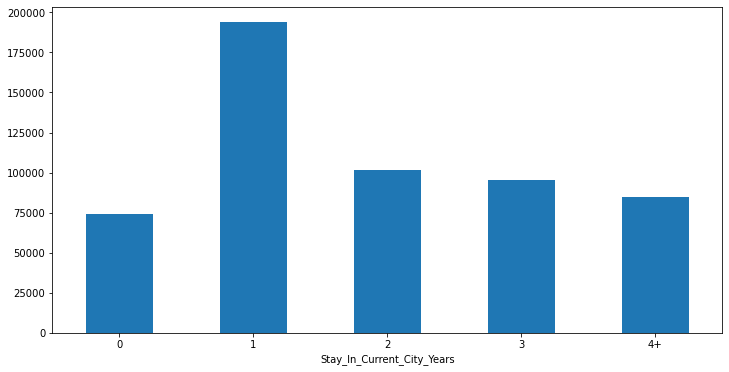

In [128]:
df2.plot(kind='bar',rot=0)

In [129]:
## Inference : Stay in current city years 1 has the maximum count in the product ID

In [130]:
Prod_6 =pd.crosstab(index=df_sales['Product_ID'],columns=df_sales['Marital_Status'])
Prod_6

Marital_Status,0,1
Product_ID,,
P00000142,717,435
P00000242,236,140
P00000342,147,97
P00000442,54,38
P00000542,103,46
...,...,...
P0099442,142,58
P0099642,8,5
P0099742,81,45


In [131]:
Prod_6.idxmax()

Marital_Status
0    P00265242
1    P00265242
dtype: object

In [132]:
Prod_6.max()

Marital_Status
0    1087
1     793
dtype: int64

In [133]:
df3 = df_sales.groupby('Marital_Status')['Product_ID'].count()
df3

Marital_Status
0    324731
1    225337
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Marital_Status'>

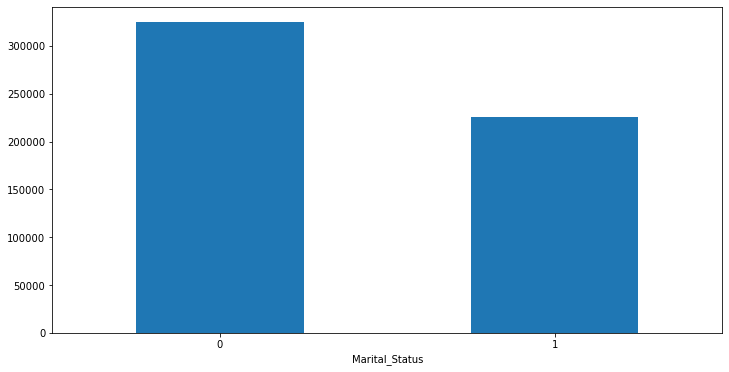

In [134]:
df3.plot(kind='bar',rot=0)


In [135]:
## Unmarried Person has the maximum count in all the Product

In [136]:
Prod_7 =pd.crosstab(index=df_sales['Product_ID'],columns=df_sales['Product_Category_1'])
Prod_7

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Product_ID,,,,,,,,,,,,,,,,,,,,
P00000142,0,0,1152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000242,0,376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000342,0,0,0,0,244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000442,0,0,0,0,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000542,0,0,0,0,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0099442,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P0099642,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0
P0099742,0,0,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
Prod_7.idxmax()

Product_Category_1
1     P00025442
2     P00277642
3     P00000142
4     P00102642
5     P00265242
6     P00059442
7     P00024042
8     P00058042
9     P00184242
10    P00052842
11    P00250642
12     P0097142
13    P00084442
14    P00086842
15    P00071442
16    P00255842
17    P00174842
18    P00117542
19    P00370853
20    P00371644
dtype: object

In [138]:
Prod_7.max()

Product_Category_1
1     1615
2      989
3     1152
4     1246
5     1880
6     1406
7      394
8     1422
9      409
10     982
11     672
12     488
13     564
14     227
15     737
16    1383
17     165
18     550
19     818
20     899
dtype: int64

In [139]:
df4 = df_sales.groupby('Product_Category_1')['Product_ID'].count()
df4

Product_Category_1
1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Product_Category_1'>

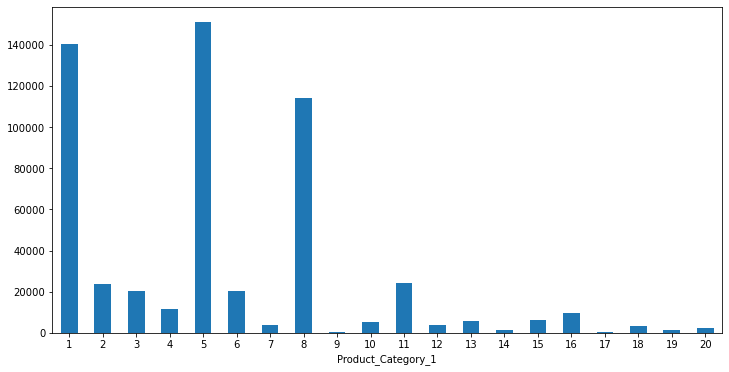

In [140]:
df4.plot(kind='bar',rot=0)

In [141]:
## Product 5 in the product category 1 has the maximum count in all the Product ID

In [142]:
Prod_8 =pd.crosstab(index=df_sales['Product_ID'],columns=df_sales['Product_Category_2'])
Prod_8

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Product_ID,,,,,,,,,,,,,,,,,
P00000142,0,0,1152,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000242,0,0,376,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000342,0,0,0,0,0,0,0,0,0,0,0,0,244,0,0,0,0
P00000442,0,0,0,0,0,0,92,0,0,0,0,0,0,0,0,0,0
P00000642,0,0,0,0,512,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0099342,0,0,0,0,0,0,440,0,0,0,0,0,0,0,0,0,0
P0099442,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0
P0099742,0,0,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
pd.crosstab(index=df_sales['Product_ID'],columns=df_sales['Product_Category_3']).apply(lambda r:r/(r.sum()),axis=1).T

Product_ID,P00000142,P00000242,P00000642,P00001042,P00001142,P00001542,P00002142,P00002242,P00003442,P00004242,...,P0096442,P0096542,P0096642,P0096742,P0096842,P0097342,P0099042,P0099742,P0099842,P0099942
Product_Category_3,,,,,,,,,,,,,,,,,,,,,
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [144]:
Prod_8.idxmax()

Product_Category_2
2.0     P00025442
3.0     P00277642
4.0     P00000142
5.0     P00116842
6.0     P00080342
7.0     P00188442
8.0     P00265242
9.0     P00259342
10.0    P00148642
11.0    P00251242
12.0    P00128242
13.0    P00086442
14.0    P00220442
15.0    P00057642
16.0    P00058042
17.0    P00051442
18.0    P00343042
dtype: object

In [145]:
Prod_8.max()

Product_Category_2
2.0     1615
3.0      989
4.0     1152
5.0      979
6.0     1203
7.0      463
8.0     1880
9.0      836
10.0    1204
11.0    1187
12.0     466
13.0     966
14.0    1282
15.0    1470
16.0    1422
17.0    1249
18.0     594
dtype: int64

In [146]:
df5 = df_sales.groupby('Product_Category_3')['Product_ID'].count()
df5

Product_Category_3
3.0       613
4.0      1875
5.0     16658
6.0      4890
8.0     12562
9.0     11579
10.0     1726
11.0     1805
12.0     9246
13.0     5459
14.0    18428
15.0    28013
16.0    32636
17.0    16702
18.0     4629
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Product_Category_3'>

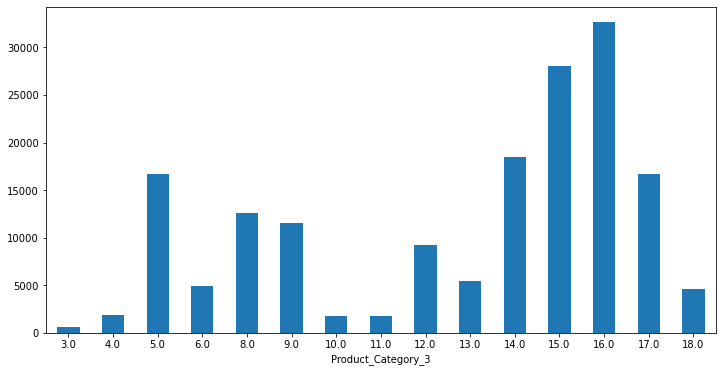

In [147]:
df5.plot(kind='bar',rot=0)

In [148]:
## Product 16 in Product category 16 has the maximum count in all the Product ID

# Relation between Gender and other variables

In [149]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [150]:
GENDER_AGE=pd.crosstab(index=df_sales['Gender'],columns=df_sales['Age']).T

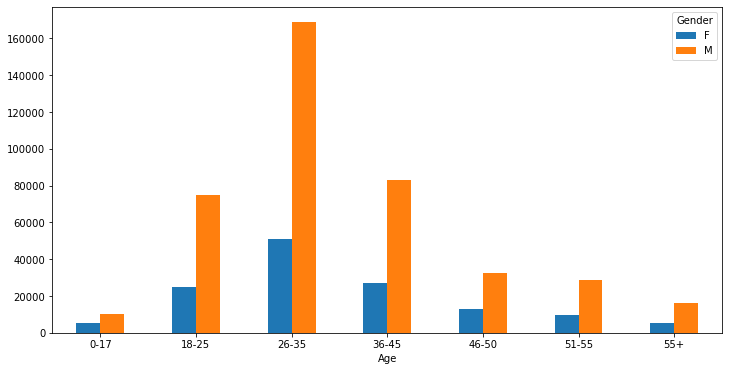

In [151]:
barplot=GENDER_AGE.plot.bar(rot=0)

In [152]:
## Most of the people are from 26-35 age group and in that also male has majority

In [153]:
GENDER_Occupation=pd.crosstab(index=df_sales['Gender'],columns=df_sales['Occupation']).T
GENDER_Occupation

Gender,F,M
Occupation,,
0,18112,51526
1,17984,29442
2,8629,17959
3,7919,9731
4,17836,54472
5,2220,9957
6,8160,12195
7,10028,49105
8,361,1185


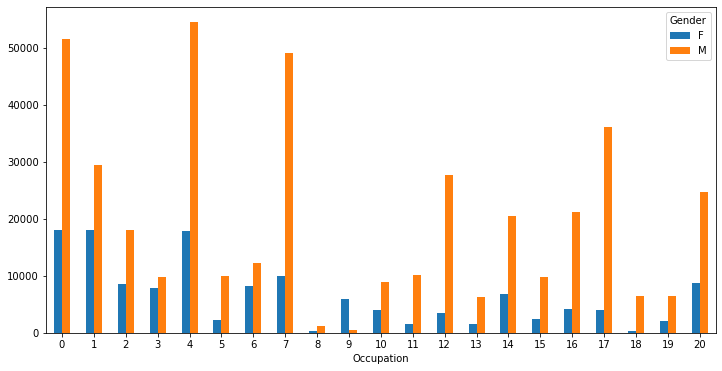

In [154]:
barplot=GENDER_Occupation.plot.bar(rot=0)

In [155]:
## Inference :- Occupation 4 has the majority of the population and in that also male are more

In [156]:
GENDER_City_category=pd.crosstab(index=df_sales['Gender'],columns=df_sales['City_Category']).T
GENDER_City_category

Gender,F,M
City_Category,,
A,35704,112016
B,57796,173377
C,42309,128866


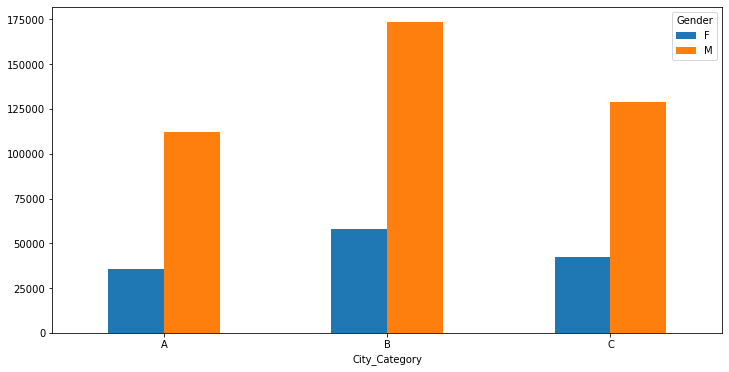

In [157]:
barplot=GENDER_City_category.plot.bar(rot=0)

In [158]:
## Inference : City Category B has the majority of the population and in that also male are dominant

In [159]:
GENDER_Stay_in_current_city=pd.crosstab(index=df_sales['Gender'],columns=df_sales['Stay_In_Current_City_Years']).T
GENDER_Stay_in_current_city

Gender,F,M
Stay_In_Current_City_Years,,
0,17063,57335
1,51298,142523
2,24332,77506
3,24520,70765
4+,18596,66130


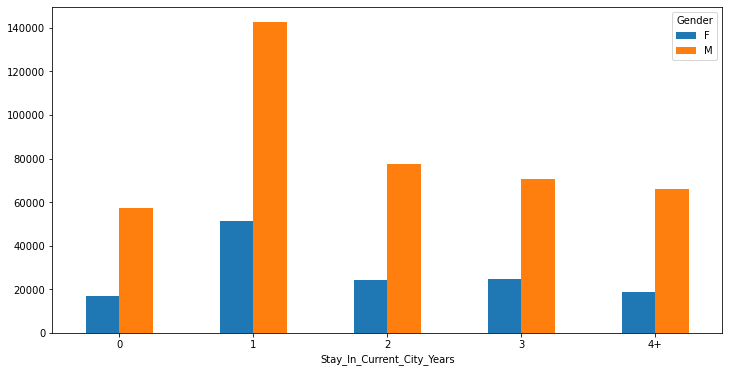

In [160]:
barplot=GENDER_Stay_in_current_city.plot.bar(rot=0)

In [161]:
## Stay in current city 1 year has majority of the population .

In [162]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [163]:
GENDER_Marital_status=pd.crosstab(index=df_sales['Gender'],columns=df_sales['Marital_Status']).T
GENDER_Marital_status

Gender,F,M
Marital_Status,,
0,78821,245910
1,56988,168349


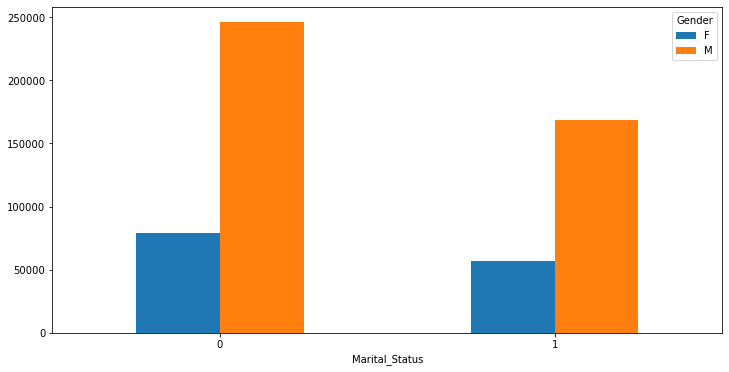

In [164]:
barplot=GENDER_Marital_status.plot.bar(rot=0)

In [165]:
## Inference : Unmarried males and females are more than married males and females

In [166]:
GENDER_Product_category_1=pd.crosstab(index=df_sales['Gender'],columns=df_sales['Product_Category_1']).T
GENDER_Product_category_1

Gender,F,M
Product_Category_1,,
1,24831,115547
2,5658,18206
3,6006,14207
4,3639,8114
5,41961,108972
6,4559,15907
7,943,2778
8,33558,80367
9,70,340


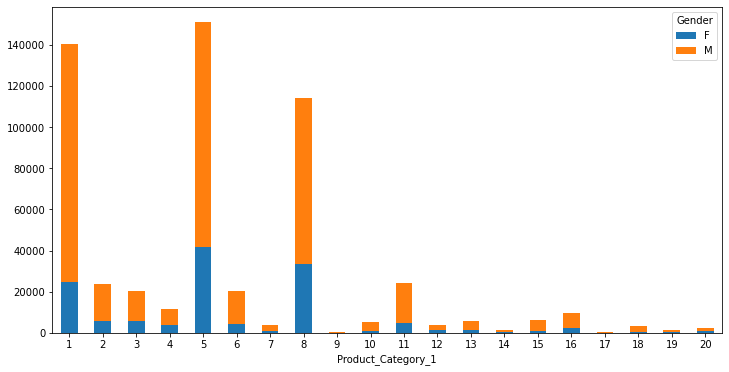

In [167]:
barplot=GENDER_Product_category_1.plot(kind='bar',stacked=True,rot=0)

In [168]:
## Product no. 5 in product category 1 has the maximum number of male and female

In [169]:
GENDER_Product_category_2=pd.crosstab(index=df_sales['Gender'],columns=df_sales['Product_Category_2']).T
GENDER_Product_category_2

Gender,F,M
Product_Category_2,,
2.0,9199,40018
3.0,617,2267
4.0,7619,18058
5.0,6155,20080
6.0,3291,13175
7.0,137,489
8.0,16529,47559
9.0,1497,4196
10.0,736,2307


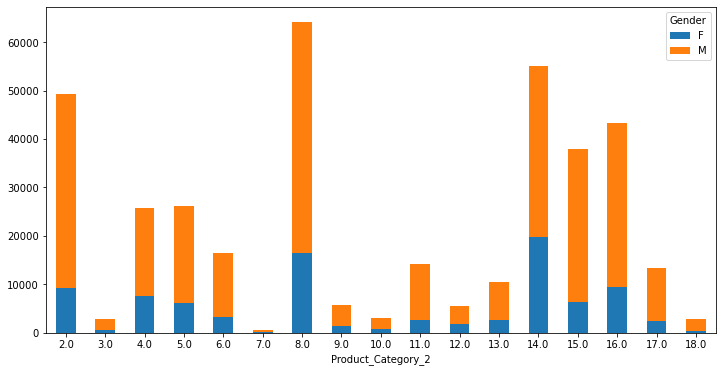

In [170]:
barplot=GENDER_Product_category_2.plot(kind='bar',stacked=True,rot=0)

In [171]:
## Product no. 8 in product category 2 has maximum no. of male where as product no. 14 has maximum number of female

In [172]:
GENDER_Product_category_3=pd.crosstab(index=df_sales['Gender'],columns=df_sales['Product_Category_3']).T
GENDER_Product_category_3



Gender,F,M
Product_Category_3,,
3.0,95,518
4.0,433,1442
5.0,4297,12361
6.0,828,4062
8.0,2941,9621
9.0,2676,8903
10.0,414,1312
11.0,334,1471
12.0,2722,6524


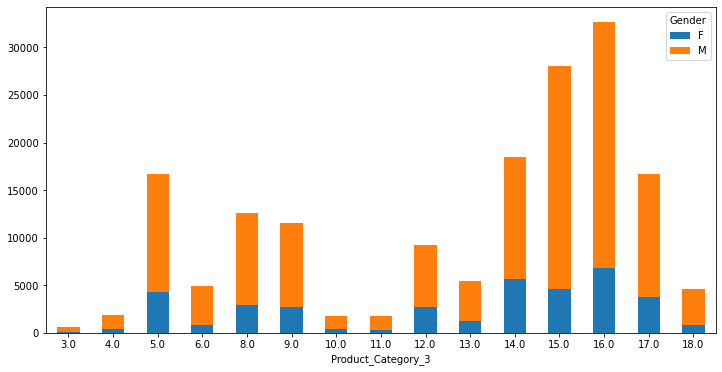

In [173]:
barplot=GENDER_Product_category_3.plot(kind='bar',stacked=True,rot=0)

In [174]:
## Inference : product no. 16 in product category 3 has maximum number of males and females

In [175]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

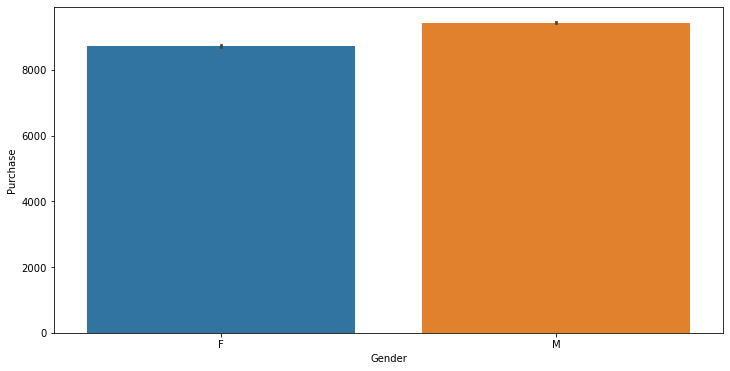

In [176]:
sns.barplot(x="Gender",y="Purchase",data=df_sales)

In [177]:
## Male has more purchase as compared to female

In [178]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# relation b/w age and other

In [179]:
age_occupation=pd.crosstab(index=df_sales['Age'],columns=df_sales['Occupation']).T
age_occupation

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Occupation,,,,,,,
0,2134,9095,34204,13393,4488,4602,1722
1,387,3820,19080,9501,7089,4410,3139
2,144,4364,12617,5183,2124,1344,812
3,0,1860,8159,4126,1599,1094,812
4,113,48241,21829,1747,129,249,0
5,0,1450,6082,3066,1187,377,15
6,0,1144,7216,4822,2561,3952,660
7,139,2078,24060,18762,6664,5355,2075
8,29,14,378,98,549,317,161


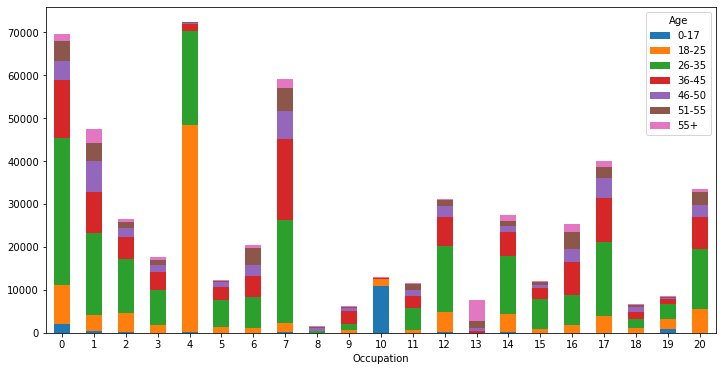

In [180]:
barplot=age_occupation.plot(kind='bar',stacked=True,rot=0)

In [181]:
## Inference : maximum occupation for every age group is shown below
## 0-17 - occupation 10
## 18-25 - occupation 4
## 26-35 - occupation 0
## 36-45 - Occupation 7
## 46-50 - occupation 1
## 51-55 - occupation 7
## 55+ - occupation 13

## And occupation 4 has majority of the population

In [182]:
age_City_category=pd.crosstab(index=df_sales['Age'],columns=df_sales['City_Category'])
age_City_category

City_Category,A,B,C
Age,,,
0-17,2544,5435,7123
18-25,27535,43247,28878
26-35,73745,91584,54258
36-45,26617,47598,35798
46-50,7607,20406,17688
51-55,6099,17741,14661
55+,3573,5162,12769


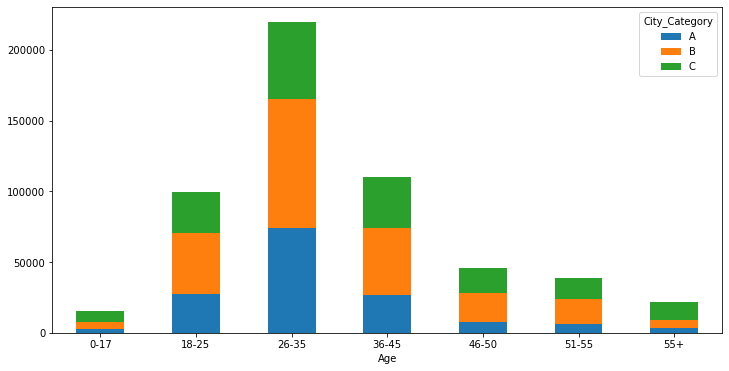

In [183]:
barplot=age_City_category.plot(kind='bar',stacked=True,rot=0)

In [184]:
## Majority of the population is in the age group of 26-35

In [185]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [186]:
age_Stay=pd.crosstab(index=df_sales['Age'],columns=df_sales['Stay_In_Current_City_Years'])
age_Stay

Stay_In_Current_City_Years,0,1,2,3,4+
Age,,,,,
0-17,2210,4925,3550,2765,1652
18-25,16582,32316,19251,15393,16118
26-35,27709,77469,39854,39478,35077
36-45,13914,37074,21056,22992,14977
46-50,6693,17912,7921,5996,7179
51-55,4380,16966,6104,5023,6028
55+,2910,7159,4102,3638,3695


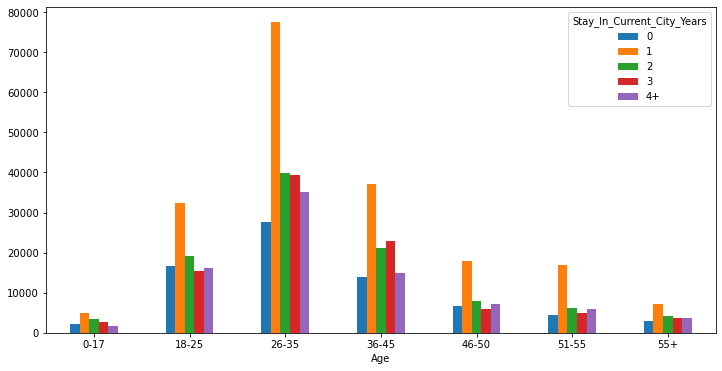

In [187]:
barplot=age_Stay.plot(kind='bar',rot=0)

In [188]:
## Most of the people in the current city from last one year are in the age group of 26-35

In [189]:
age_Marital=pd.crosstab(index=df_sales['Age'],columns=df_sales['Marital_Status'])
age_Marital

Marital_Status,0,1
Age,,
0-17,15102,0
18-25,78544,21116
26-35,133296,86291
36-45,66377,43636
46-50,12690,33011
51-55,10839,27662
55+,7883,13621


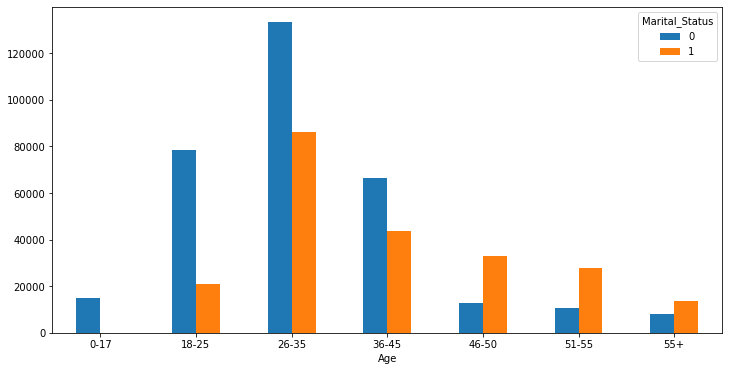

In [190]:
barplot=age_Marital.plot(kind='bar',rot=0)

In [191]:
## Majority of the married and unmarried person belongs to the age group of 26-35

In [192]:
age_Prod1=pd.crosstab(index=df_sales['Age'],columns=df_sales['Product_Category_1']).T
age_Prod1

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category_1,,,,,,,
1,3585,26962,58249,27648,10474,9049,4411
2,805,4428,8928,4912,2105,1781,905
3,1200,4710,7662,3854,1376,924,487
4,758,2463,4192,2354,990,678,318
5,4330,28522,61473,29377,11971,9893,5367
6,399,3749,8485,3899,1622,1450,862
7,53,481,1651,809,327,266,134
8,2258,17911,44256,23296,10656,9340,6208
9,16,63,154,107,33,29,8


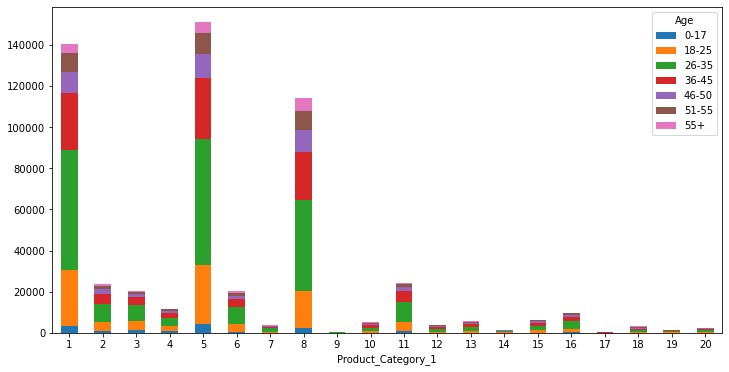

In [193]:
barplot=age_Prod1.plot(kind='bar',stacked=True,rot=0)

In [194]:
age_Prod1.idxmax()

Age
0-17     5
18-25    5
26-35    5
36-45    5
46-50    5
51-55    5
55+      8
dtype: int64

In [195]:
## Inference : Demanding Product from Product category 1  for every age group is product no. 5 except for age group 55+.
## for age 55+ product no. 8 is demanding

In [196]:
age_Prod2=pd.crosstab(index=df_sales['Age'],columns=df_sales['Product_Category_2']).T
age_Prod2

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category_2,,,,,,,
2.0,1414,9806,20075,9622,3681,3120,1499
3.0,125,645,1192,511,189,136,86
4.0,1533,6040,9345,4945,1829,1315,670
5.0,1036,5328,10556,5137,1923,1540,715
6.0,367,3099,6882,3157,1268,1063,630
7.0,10,106,262,137,53,38,20
8.0,1406,10878,26038,12857,5447,4744,2718
9.0,156,1100,2420,1141,408,334,134
10.0,51,394,1109,682,308,305,194


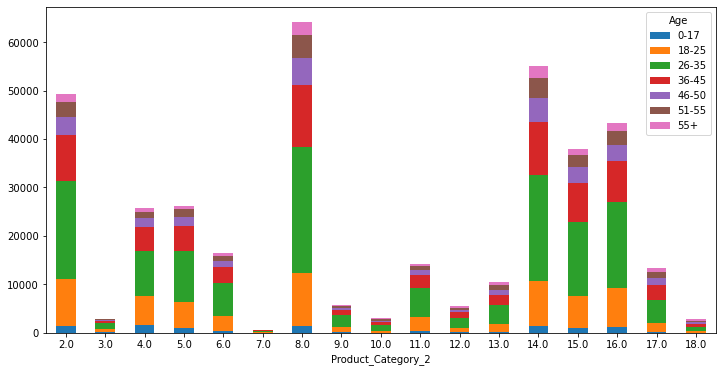

In [197]:
barplot=age_Prod2.plot(kind='bar',stacked=True,rot=0)

In [198]:
age_Prod2.idxmax()

Age
0-17     4.0
18-25    8.0
26-35    8.0
36-45    8.0
46-50    8.0
51-55    8.0
55+      8.0
dtype: float64

In [199]:
## Inference : Demanding Product from Product category 2 for every age group is product no. 8 except for age group 0-17.
## for age 0-17 product no. 4 is demanding

In [200]:
age_Prod3=pd.crosstab(index=df_sales['Age'],columns=df_sales['Product_Category_3']).T
age_Prod3

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category_3,,,,,,,
3.0,31,145,271,111,36,14,5
4.0,114,463,744,315,124,74,41
5.0,737,3601,6725,3189,1121,860,425
6.0,98,1047,2176,884,319,247,119
8.0,325,2057,4949,2629,1064,971,567
9.0,470,2620,4414,2226,853,677,319
10.0,29,232,666,389,149,157,104
11.0,63,355,740,341,154,110,42
12.0,415,1900,3560,1857,730,505,279


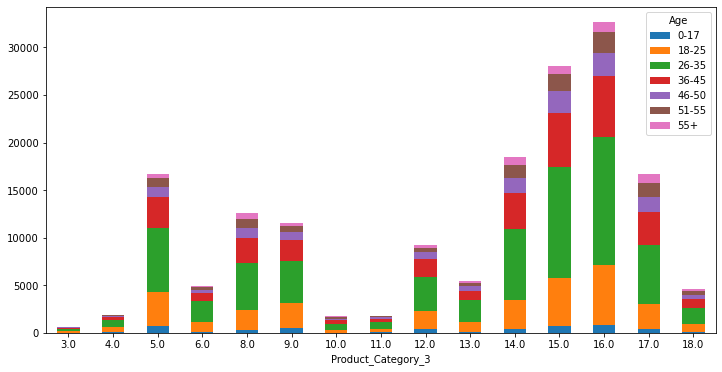

In [201]:
barplot=age_Prod3.plot(kind='bar',stacked=True,rot=0)

In [202]:
age_Prod3.idxmax()

Age
0-17     16.0
18-25    16.0
26-35    16.0
36-45    16.0
46-50    16.0
51-55    16.0
55+      16.0
dtype: float64

In [203]:
## Inference : Demanding Product from Product category 3 for every age group is product no. 16

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

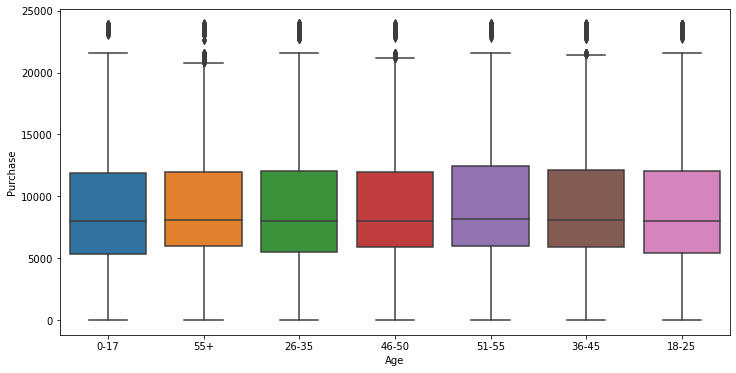

In [204]:
sns.boxplot(df_sales['Age'],df_sales['Purchase'])

In [205]:
## Inference :- Age 26-35 has the maximum amount of purchase

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

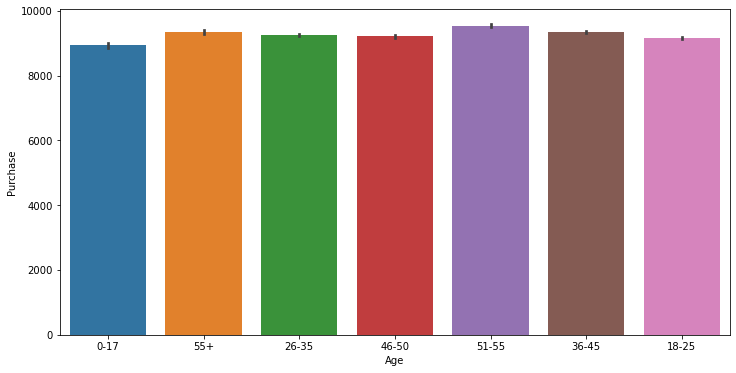

In [206]:
sns.barplot(df_sales['Age'],df_sales['Purchase'])

In [207]:
a = df_sales.groupby('Age')['Purchase'].sum()
a

Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

In [208]:
a.sum()

5095812742

In [209]:
df_sales['Purchase'].sum()

5095812742

In [210]:
x =(df_sales.groupby('Age')['Purchase'].sum()/df_sales['Purchase'].sum())*100

x

Age
0-17      2.647530
18-25    17.933325
26-35    39.871374
36-45    20.145361
46-50     8.258612
51-55     7.203947
55+       3.939850
Name: Purchase, dtype: float64

In [211]:
table = pd.pivot_table(df_sales,index=['Gender','Age','City_Category'],values =['Purchase'],aggfunc=[np.sum])
table

sum
                             Purchase
Gender Age   City_Category           
F      0-17  A               11324587
             B               13844363
             C               17217028
       18-25 A               51104517
             B               93774009
             C               60597316
       26-35 A              152198055
             B              183691038
             C              107087140
       36-45 A               61933245
             B               97271104
             C               84234614
       46-50 A               10919482
             B               55201613
             C               50585769
       51-55 A               15486422
             B               37662356
             C               36317219
       55+   A                3363607
             B               12172525
             C               30246633
M      0-17  A               10592254
             B               34621137
             C               47313814
       18-25 A              192132351
             B              296820223
             C              219420259
       26-35 A              508004279
             B              654228670
             C              426561396
       36-45 A              177362475
             B              336246771
             C              269521675
       46-50 A               52587761
             B              133511588
             C              118037190
       51-55 A               42505950
             B              128054753
             C              107072944
       55+   A               26956676
             B               38433455
             C               89594479

# relationship b/w Occupation and others

In [212]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [213]:
Occu_City_Category=pd.crosstab(index=df_sales['Occupation'],columns=df_sales['City_Category'])
Occu_City_Category

City_Category,A,B,C
Occupation,,,
0,18858,29850,20930
1,12809,19756,14861
2,9232,11366,5990
3,5645,6905,5100
4,24205,29854,18249
5,2383,6615,3179
6,3755,10953,5647
7,16216,22986,19931
8,104,829,613


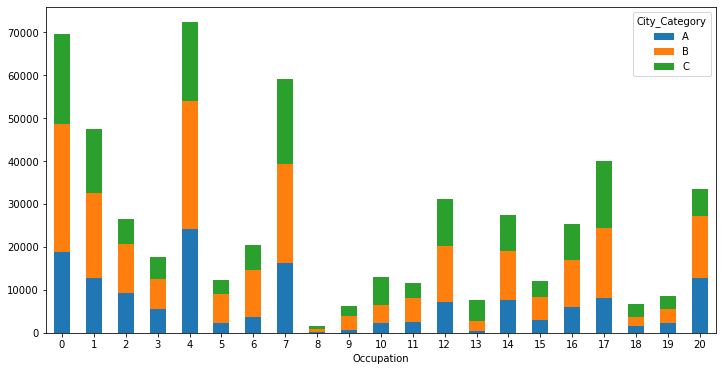

In [214]:
barplot=Occu_City_Category.plot(kind='bar',stacked=True,rot=0)

In [215]:
Occu_City_Category.idxmax()

City_Category
A    4
B    4
C    0
dtype: int64

In [216]:
## Inference : City Category A and B has majority of occupation 4 and City C has majority of occupation 0

In [217]:
Occu_Stays=pd.crosstab(index=df_sales['Occupation'],columns=df_sales['Stay_In_Current_City_Years'])
Occu_Stays

Stay_In_Current_City_Years,0,1,2,3,4+
Occupation,,,,,
0,10622,24690,12551,10776,10999
1,5996,16394,9537,8423,7076
2,4619,9776,4135,5324,2734
3,2120,5863,3833,3262,2572
4,11756,21711,15721,11889,11231
5,2098,5694,1744,1184,1457
6,1574,8631,2671,3621,3858
7,7454,22239,10754,9210,9476
8,317,944,149,0,136


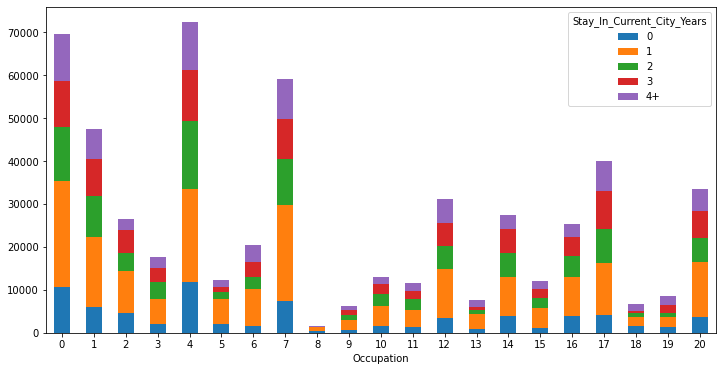

In [218]:
barplot=Occu_Stays.plot(kind='bar',stacked=True,rot=0)

In [219]:
Occu_Stays.idxmax()

Stay_In_Current_City_Years
0     4
1     0
2     4
3     4
4+    4
dtype: int64

In [220]:
## Inference :Occupation 4 has majority in the population who are staying in the current city from last 2,3,4+ and recent months
## thos who are living in the current city since last year has majority of the occupation 0

In [221]:
Occu_Marital=pd.crosstab(index=df_sales['Occupation'],columns=df_sales['Marital_Status'])
Occu_Marital

Marital_Status,0,1
Occupation,,
0,40489,29149
1,24724,22702
2,14306,12282
3,10364,7286
4,52776,19532
5,7608,4569
6,11190,9165
7,33403,25730
8,691,855


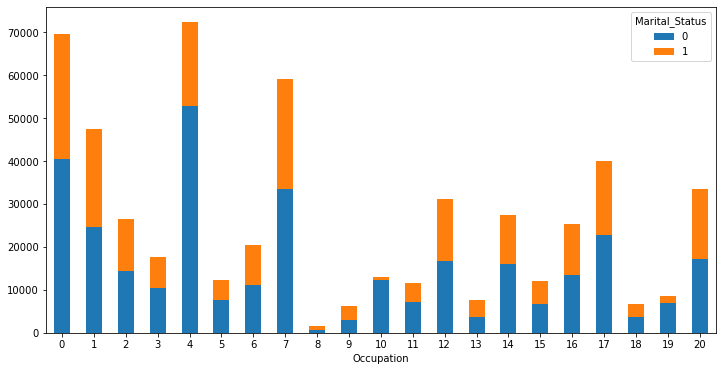

In [222]:
barplot=Occu_Marital.plot(kind='bar',stacked=True,rot=0)

In [223]:
Occu_Marital.idxmax()

Marital_Status
0    4
1    0
dtype: int64

In [224]:
## Inference : Unmarried people are more in occupation 4 whereas married people are more in occupation 0.

In [225]:
Occu_Prod1=pd.crosstab(index=df_sales['Occupation'],columns=df_sales['Product_Category_1'])
Occu_Prod1

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Occupation,,,,,,,,,,,,,,,,,,,,
0,17643,2971,2635,1481,18985,2568,559,14087,49,636,3752,445,720,196,718,1225,63,426,188,291
1,10315,1922,1559,973,13169,1767,374,11998,26,515,1681,434,554,169,529,784,61,238,139,219
2,5742,1110,958,512,7613,1039,229,6266,12,283,1151,243,247,81,304,448,14,151,62,123
3,3944,666,614,398,5286,651,137,3843,13,195,693,179,220,68,171,342,15,101,49,65
4,19238,3039,3306,1703,20459,2657,449,13830,51,474,3192,372,591,180,744,1192,46,268,178,339
5,3646,589,447,252,3276,379,37,1929,9,85,791,78,96,23,144,213,9,95,24,55
6,4601,821,750,445,5691,735,146,4785,16,189,855,161,205,72,196,416,18,91,63,99
7,16037,2511,1604,1099,15619,2303,327,12620,39,525,2412,465,608,160,632,1168,83,461,192,268
8,512,99,67,39,371,45,5,263,1,13,63,3,8,0,24,16,1,7,5,4


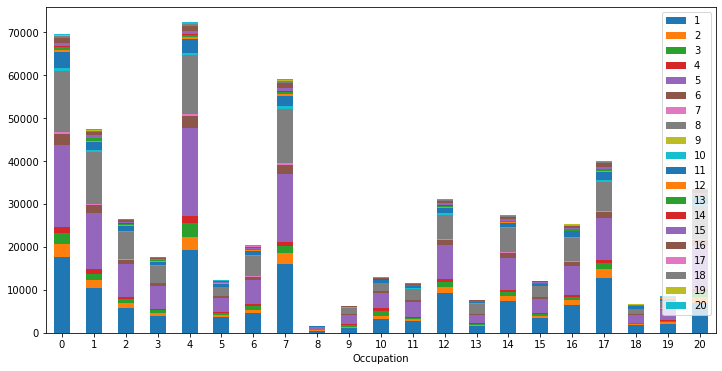

In [226]:
barplot=Occu_Prod1.plot(kind='bar',stacked=True,rot=0)
plt.legend()

In [227]:
Occu_Prod1.idxmax()

Product_Category_1
1      4
2      4
3      4
4      4
5      4
6      4
7      0
8      0
9     17
10     0
11     0
12     7
13     0
14     0
15     4
16     0
17     7
18     7
19     7
20     4
dtype: int64

In [228]:
## Inference :- product 4 is most demanding in  product category 1 with respect to occupation


In [229]:
Occu_Prod2=pd.crosstab(index=df_sales['Occupation'],columns=df_sales['Product_Category_2'])
Occu_Prod2

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Occupation,,,,,,,,,,,,,,,,,
0,6099,352,3366,3365,2096,89,7977,738,369,1933,703,1362,6847,4613,5526,1603,321
1,3720,209,2005,1968,1299,64,5844,440,299,957,559,1003,5547,2808,3495,1226,245
2,1969,131,1173,1175,779,35,3326,297,149,658,336,556,2826,1653,1893,609,129
3,1365,80,759,851,510,21,2077,190,110,409,228,379,2009,984,1444,396,93
4,6800,456,4098,3674,2229,87,8107,768,310,2046,637,1196,7126,4845,5851,1417,252
5,1222,76,578,667,396,7,1274,168,49,432,124,184,977,926,988,263,72
6,1548,113,933,908,554,27,2427,172,125,474,225,385,2299,1269,1536,471,94
7,5398,269,2184,2682,1799,57,7185,592,315,1419,559,1134,5841,4023,4838,1652,410
8,206,8,93,85,46,1,160,28,11,37,13,23,118,145,105,40,6


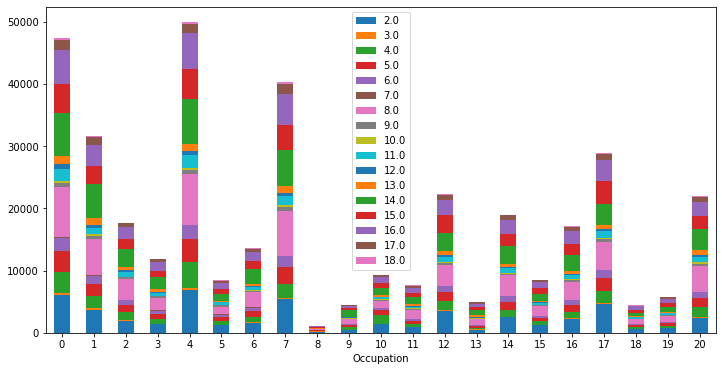

In [230]:
barplot=Occu_Prod2.plot(kind='bar',stacked=True,rot=0)
plt.legend()

In [231]:
Occu_Prod2.idxmax()

Product_Category_2
2.0     4
3.0     4
4.0     4
5.0     4
6.0     4
7.0     0
8.0     4
9.0     4
10.0    0
11.0    4
12.0    0
13.0    0
14.0    4
15.0    4
16.0    4
17.0    7
18.0    7
dtype: int64

In [232]:
## Inference :- product 4 is most demanding in  product category 2 with respect to occupation


In [233]:
Occu_Prod3=pd.crosstab(index=df_sales['Occupation'],columns=df_sales['Product_Category_3'])
Occu_Prod3

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Occupation,,,,,,,,,,,,,,,
0,77,260,2126,673,1576,1465,196,268,1205,666,2380,3451,4151,1916,561
1,34,134,1297,331,1126,879,175,138,740,428,1750,2072,2538,1485,384
2,30,87,727,209,597,529,79,77,486,229,934,1174,1476,695,212
3,15,50,505,149,387,323,59,72,316,164,649,722,979,468,157
4,90,320,2464,702,1527,1744,161,251,1352,780,2243,3590,4483,2104,553
5,18,48,390,133,268,286,39,56,220,110,379,728,741,339,119
6,17,78,552,152,462,391,76,57,346,186,721,877,1097,640,164
7,44,167,1546,583,1415,1198,186,177,855,626,2025,2926,3519,1964,571
8,2,8,56,13,40,51,1,6,26,17,63,111,105,29,14


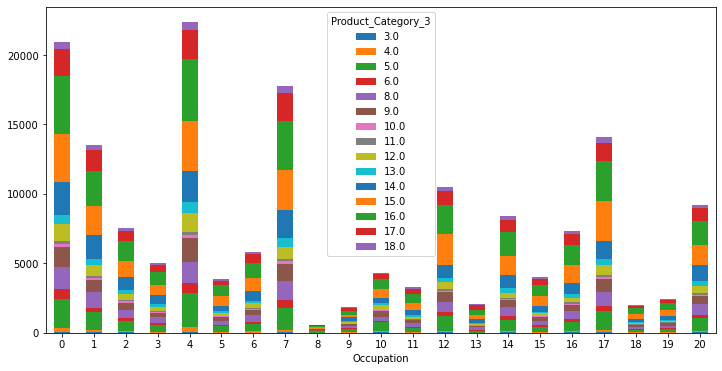

In [234]:
barplot=Occu_Prod3.plot(kind='bar',stacked=True,rot=0)

In [235]:
Occu_Prod3.idxmax()

Product_Category_3
3.0     4
4.0     4
5.0     4
6.0     4
8.0     0
9.0     4
10.0    0
11.0    0
12.0    4
13.0    4
14.0    0
15.0    4
16.0    4
17.0    4
18.0    7
dtype: int64

In [236]:
## Inference :- product 4 is most demanding in  product category 3 with respect to occupation


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

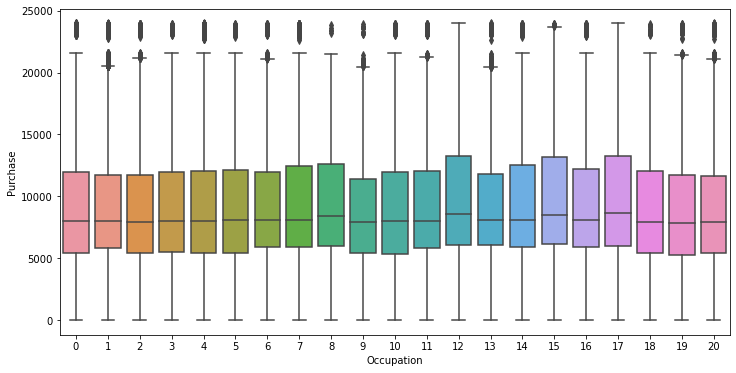

In [237]:
sns.boxplot(df_sales['Occupation'],df_sales['Purchase'])

In [238]:
df_sales['Purchase'].max() 

23961

In [239]:
## Inference :-  

# relation b/w City category and others

In [240]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [241]:
City_category_stay=pd.crosstab(index=df_sales['City_Category'],columns=df_sales['Stay_In_Current_City_Years']).T
City_category_stay

City_Category,A,B,C
Stay_In_Current_City_Years,,,
0,24178,28687,21533
1,49305,83413,61103
2,27114,41772,32952
3,24804,42691,27790
4+,22319,34610,27797


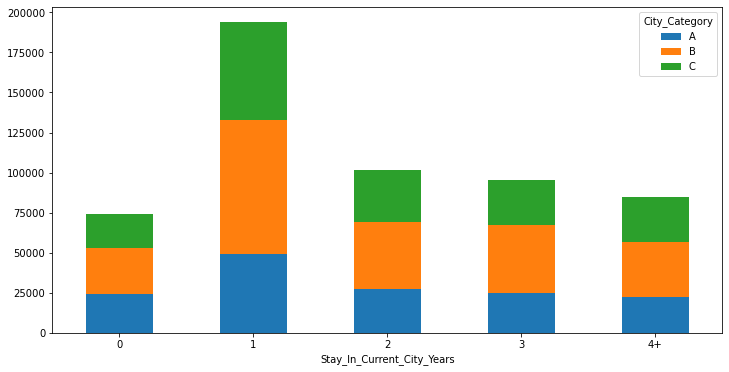

In [242]:
barplot=City_category_stay.plot(kind='bar',stacked=True,rot=0)

In [243]:
## Majority of the population lives in the current city from last year in all the city categories

In [244]:
City_category_Marital=pd.crosstab(index=df_sales['City_Category'],columns=df_sales['Marital_Status'])
City_category_Marital

Marital_Status,0,1
City_Category,,
A,91173,56547
B,136721,94452
C,96837,74338


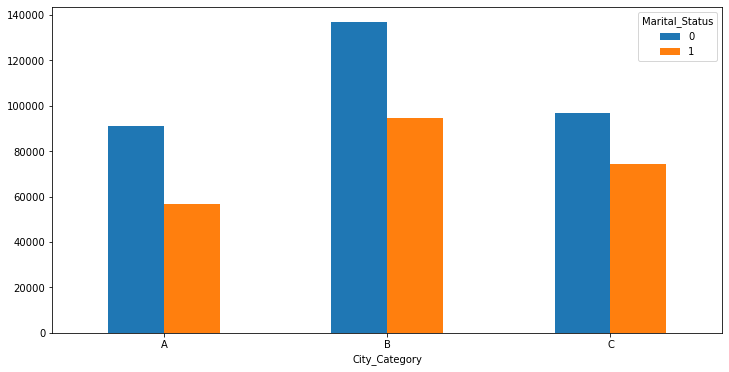

In [245]:
barplot=City_category_Marital.plot(kind='bar',rot=0)

In [246]:
## City Category B has the maximum number of married and unmarried person

In [247]:
City_category_Prod1=pd.crosstab(index=df_sales['City_Category'],columns=df_sales['Product_Category_1']).T
City_category_Prod1

City_Category,A,B,C
Product_Category_1,,,
1,35081,58253,47044
2,6141,10444,7279
3,4943,8587,6683
4,3050,5226,3477
5,42211,64138,44584
6,5507,8526,6433
7,1226,1599,896
8,32179,47553,34193
9,110,174,126


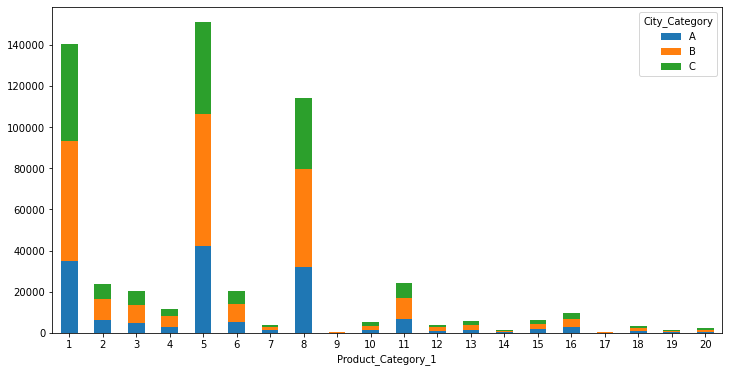

In [248]:
barplot=City_category_Prod1.plot(kind='bar',stacked=True,rot=0)

In [249]:
City_category_Prod1.idxmax()

City_Category
A    5
B    5
C    1
dtype: int64

In [250]:
## Inference : Product no. 5 in Product Category 1 is most demanding in city A and B where as product 1 is demanding in city C

In [251]:
City_category_Prod2=pd.crosstab(index=df_sales['City_Category'],columns=df_sales['Product_Category_2']).T
City_category_Prod2

City_Category,A,B,C
Product_Category_2,,,
2.0,11981,20170,17066
3.0,710,1176,998
4.0,6313,11230,8134
5.0,6841,11328,8066
6.0,4378,6916,5172
7.0,181,266,179
8.0,17367,26728,19993
9.0,1480,2474,1739
10.0,780,1206,1057


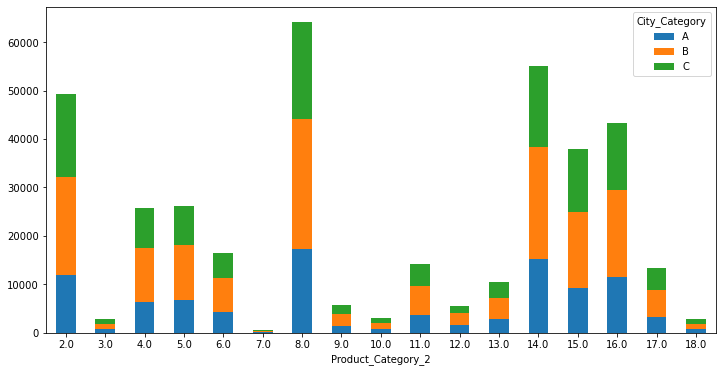

In [252]:
barplot=City_category_Prod2.plot(kind='bar',stacked=True,rot=0)

In [253]:
City_category_Prod2.idxmax()

City_Category
A    8.0
B    8.0
C    8.0
dtype: float64

In [254]:
## Inference : Product no. 8 in Product Category 2 is most demanding in  All the cities.

In [255]:
City_category_Prod3=pd.crosstab(index=df_sales['City_Category'],columns=df_sales['Product_Category_3']).T
City_category_Prod3

City_Category,A,B,C
Product_Category_3,,,
3.0,152,269,192
4.0,477,799,599
5.0,4073,6794,5791
6.0,1266,2056,1568
8.0,3071,5123,4368
9.0,2697,4790,4092
10.0,424,690,612
11.0,454,772,579
12.0,2355,4071,2820


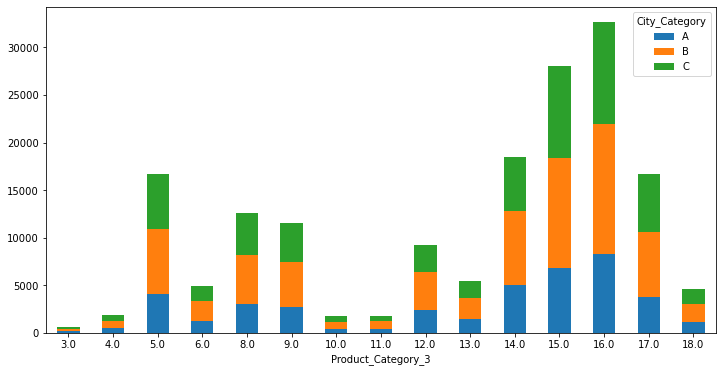

In [256]:
barplot=City_category_Prod3.plot(kind='bar',stacked=True,rot=0)

In [257]:
City_category_Prod3.idxmax()

City_Category
A    16.0
B    16.0
C    16.0
dtype: float64

In [258]:
## Inference : Product no. 16 in Product Category 3 is most demanding in  All the cities.

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

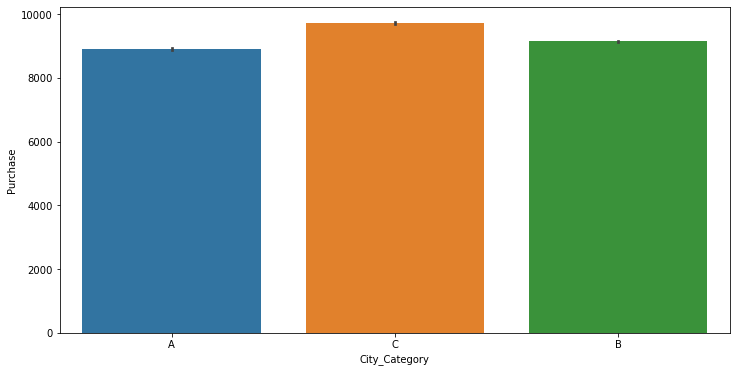

In [259]:
sns.barplot(x='City_Category',y='Purchase',data=df_sales)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

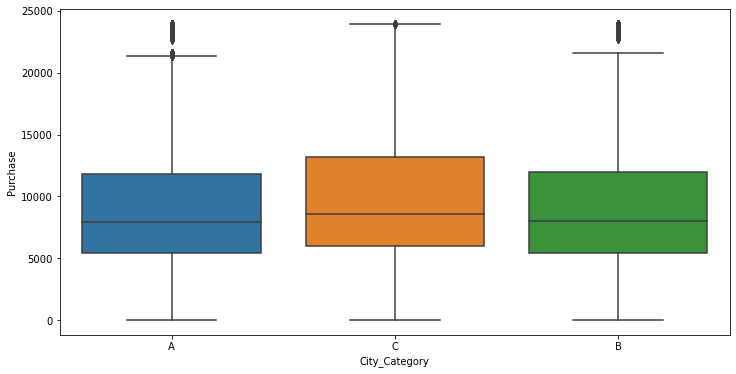

In [260]:
sns.boxplot(df_sales['City_Category'],df_sales['Purchase'])

In [261]:
## Inference : Maximum Purchase are done from City category C

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

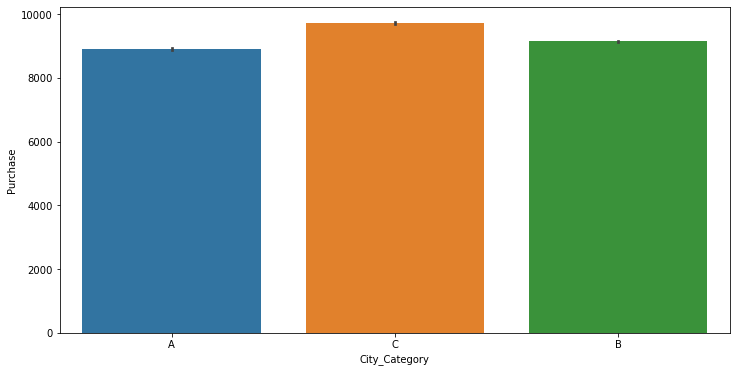

In [262]:
sns.barplot(df_sales['City_Category'],df_sales['Purchase'])

In [263]:
(df_sales.groupby('City_Category')['Purchase'].sum()/df_sales['Purchase'].sum())*100

City_Category
A    25.834381
B    41.515136
C    32.650483
Name: Purchase, dtype: float64

# Relatioship b/w Stay_In_Current_City_Years and others

In [264]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [265]:
Stays_Marital=pd.crosstab(index=df_sales['Stay_In_Current_City_Years'],columns=df_sales['Marital_Status'])
Stays_Marital

Marital_Status,0,1
Stay_In_Current_City_Years,,
0,44908,29490
1,110696,83125
2,60800,41038
3,57647,37638
4+,50680,34046


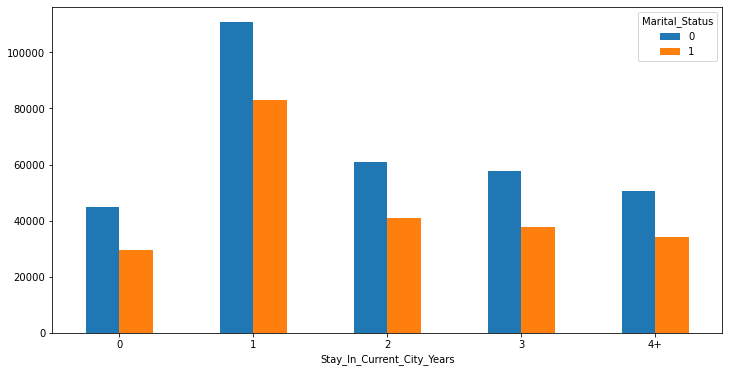

In [266]:
barplot=Stays_Marital.plot(kind='bar',rot=0)

In [267]:
## Inference : Both Married and Unmarried people are maximum who stays in the current city from last 1 year

In [268]:
Stays_Prod1=pd.crosstab(index=df_sales['Stay_In_Current_City_Years'],columns=df_sales['Product_Category_1']).T
Stays_Prod1

Stay_In_Current_City_Years,0,1,2,3,4+
Product_Category_1,,,,,
1,18555,48819,26513,24981,21510
2,3200,8379,4610,4230,3445
3,2789,7008,3912,3585,2919
4,1587,4099,2134,2102,1831
5,20600,53102,28106,26372,22753
6,2737,7266,3733,3441,3289
7,558,1291,601,690,581
8,15341,41154,20238,19074,18118
9,62,132,87,77,52


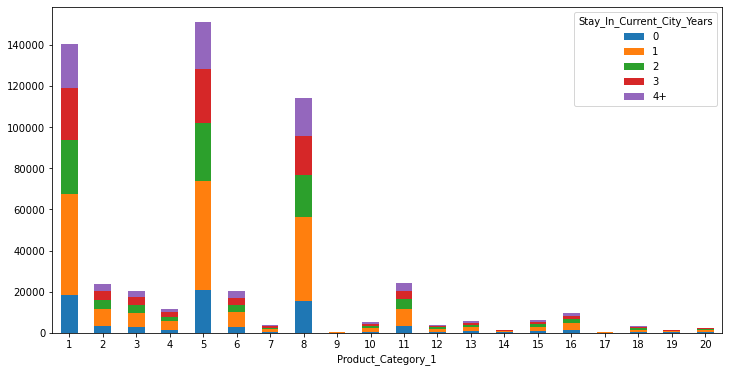

In [269]:
barplot=Stays_Prod1.plot(kind='bar',stacked=True,rot=0)

In [270]:
Stays_Prod1.idxmax()

Stay_In_Current_City_Years
0     5
1     5
2     5
3     5
4+    5
dtype: int64

In [271]:
## Product no. 5 is most demanding in product category 1 when we see according to stay in current city years

In [272]:
Stays_Prod2=pd.crosstab(index=df_sales['Stay_In_Current_City_Years'],columns=df_sales['Product_Category_2']).T
Stays_Prod2

Stay_In_Current_City_Years,0,1,2,3,4+
Product_Category_2,,,,,
2.0,6551,16985,9388,8811,7482
3.0,394,984,564,534,408
4.0,3442,8927,4981,4672,3655
5.0,3512,9166,4869,4672,4016
6.0,2165,5754,3170,2841,2536
7.0,103,205,129,101,88
8.0,8624,22795,11814,10908,9947
9.0,760,2011,1121,1006,795
10.0,417,1060,521,552,493


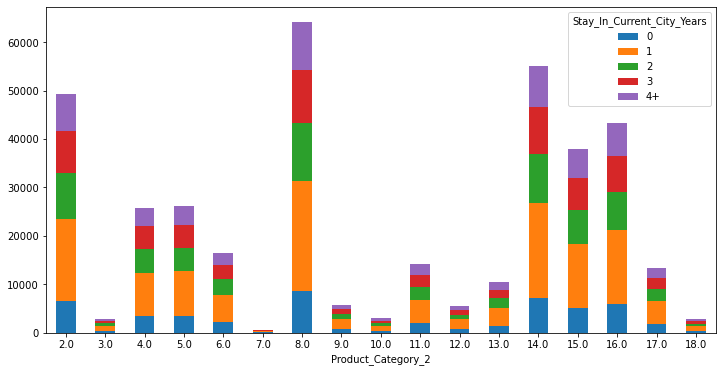

In [273]:
barplot=Stays_Prod2.plot(kind='bar',stacked=True,rot=0)

In [274]:
Stays_Prod2.idxmax()

Stay_In_Current_City_Years
0     8.0
1     8.0
2     8.0
3     8.0
4+    8.0
dtype: float64

In [275]:
## Product no. 8 is most demanding in product category 2 when we see according to stay in current city years

In [276]:
Stays_Prod3=pd.crosstab(index=df_sales['Stay_In_Current_City_Years'],columns=df_sales['Product_Category_3']).T
Stays_Prod3

Stay_In_Current_City_Years,0,1,2,3,4+
Product_Category_3,,,,,
3.0,101,217,111,95,89
4.0,242,635,380,358,260
5.0,2264,5842,3193,2892,2467
6.0,676,1675,947,873,719
8.0,1622,4467,2345,2142,1986
9.0,1509,3953,2312,2110,1695
10.0,223,615,313,306,269
11.0,250,609,347,321,278
12.0,1264,3250,1766,1663,1303


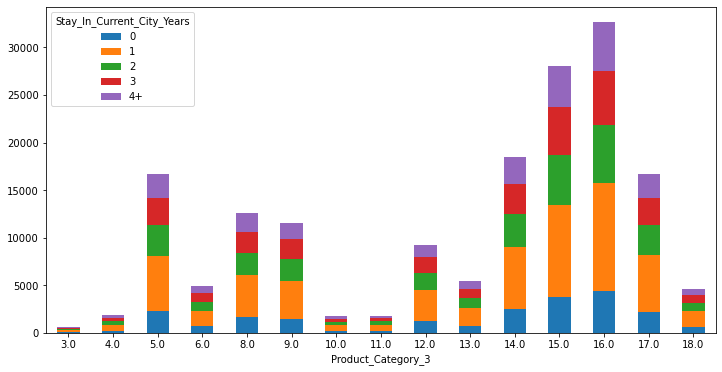

In [277]:
barplot=Stays_Prod3.plot(kind='bar',stacked=True,rot=0)

In [278]:
Stays_Prod3.idxmax()

Stay_In_Current_City_Years
0     16.0
1     16.0
2     16.0
3     16.0
4+    16.0
dtype: float64

In [279]:
## Product no. 16 is most demanding in product category 3 when we see according to stay in current city years

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

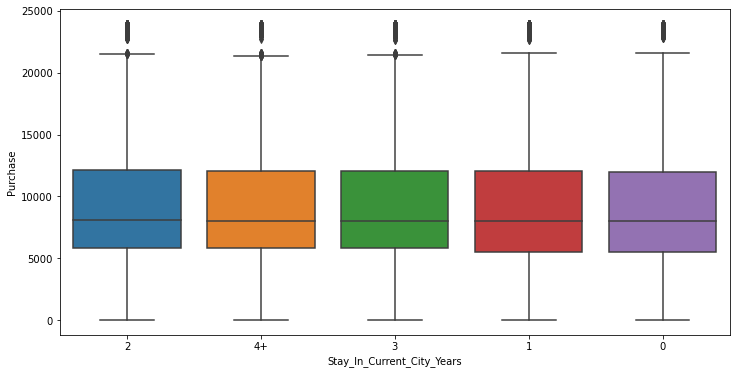

In [280]:
sns.boxplot(df_sales['Stay_In_Current_City_Years'],df_sales["Purchase"])

In [281]:
## Inference : Purchase is almost same when we compare it with the living years in current city

# Relation b/w Marital_Status and others

In [282]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [283]:
Marital_prod1=pd.crosstab(index=df_sales['Marital_Status'],columns=df_sales['Product_Category_1']).T
Marital_prod1

Marital_Status,0,1
Product_Category_1,,
1,84375,56003
2,14138,9726
3,12359,7854
4,7177,4576
5,89656,61277
6,12139,8327
7,2040,1681
8,65411,48514
9,247,163


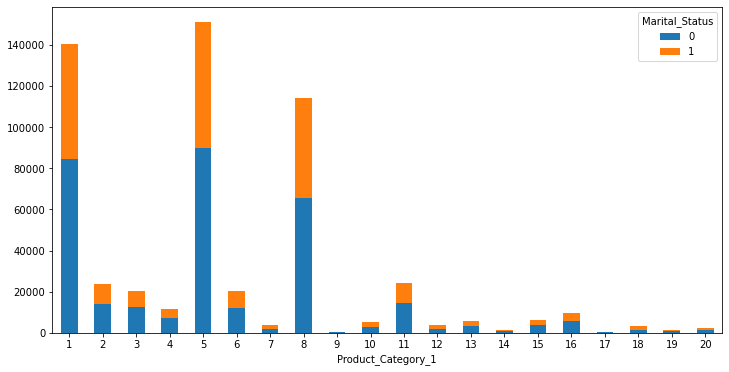

In [284]:
barplot=Marital_prod1.plot(kind='bar',stacked=True,rot=0)

In [285]:
## Product no. 5 is most demanding product in product category 1 among married and unmarried people

In [286]:
Marital_prod2=pd.crosstab(index=df_sales['Marital_Status'],columns=df_sales['Product_Category_2']).T
Marital_prod2

Marital_Status,0,1
Product_Category_2,,
2.0,29872,19345
3.0,1801,1083
4.0,15812,9865
5.0,15903,10332
6.0,9804,6662
7.0,369,257
8.0,37354,26734
9.0,3423,2270
10.0,1647,1396


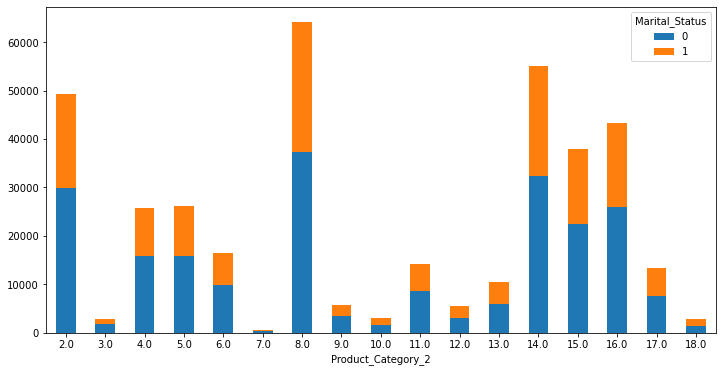

In [287]:
barplot=Marital_prod2.plot(kind='bar',stacked=True,rot=0)

In [288]:
## Product no. 8 is most demanding product in product category 2 among married and unmarried people

In [289]:
Marital_prod3=pd.crosstab(index=df_sales['Marital_Status'],columns=df_sales['Product_Category_3']).T
Marital_prod3

Marital_Status,0,1
Product_Category_3,,
3.0,387,226
4.0,1210,665
5.0,10256,6402
6.0,3055,1835
8.0,7368,5194
9.0,7156,4423
10.0,957,769
11.0,1106,699
12.0,5590,3656


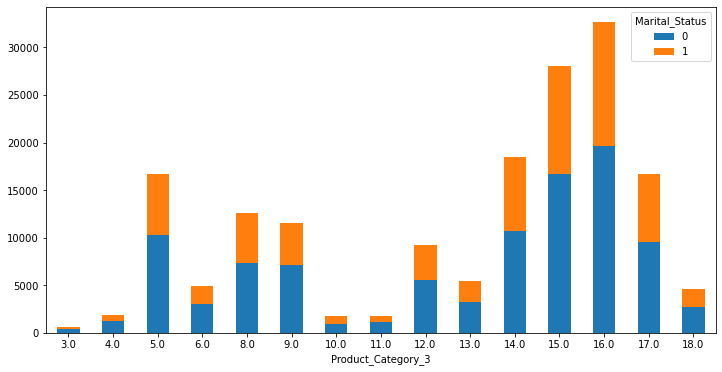

In [290]:
barplot=Marital_prod3.plot(kind='bar',stacked=True,rot=0)

In [291]:
## Product no. 16 is most demanding product in product category 3 among married and unmarried people

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

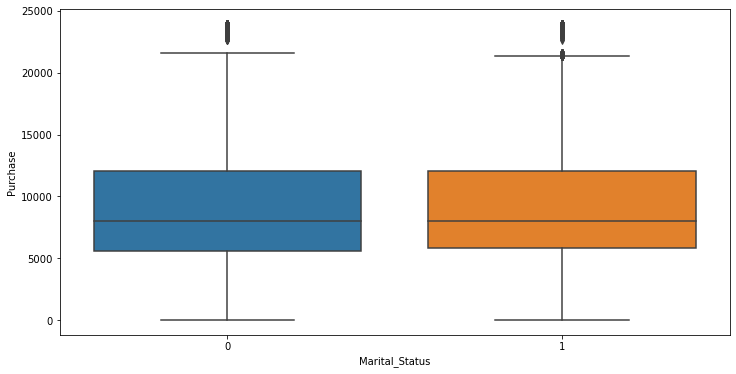

In [292]:
sns.boxplot(df_sales['Marital_Status'],df_sales['Purchase'])

In [293]:
## Both married and unmarried people do almost same amount of purchase

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

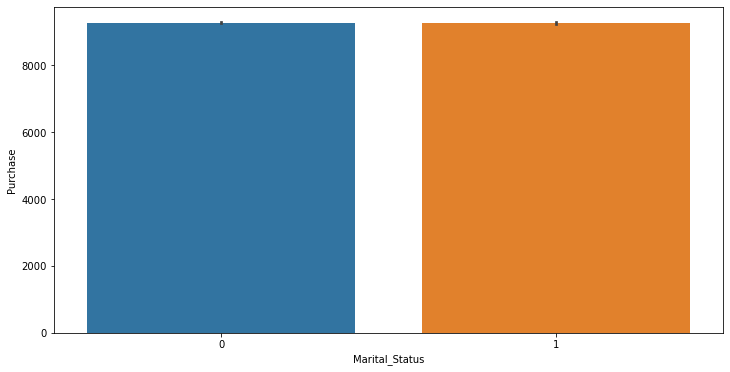

In [294]:
sns.barplot(df_sales['Marital_Status'],df_sales['Purchase'])

In [295]:
(df_sales.groupby('Marital_Status')['Purchase'].sum()/df_sales['Purchase'].sum())*100

Marital_Status
0    59.047057
1    40.952943
Name: Purchase, dtype: float64

In [296]:
pd.pivot_table(df_sales,index=['Gender','Marital_Status'],values = ['Purchase'],aggfunc=[np.sum])

sum
                         Purchase
Gender Marital_Status            
F      0                684154127
       1                502078515
M      0               2324773320
       1               1584806780

# Relation b/w Product_Category_1 and others

In [297]:
prod1_2=pd.crosstab(index=df_sales['Product_Category_1'],columns=df_sales['Product_Category_2'])
prod1_2

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Product_Category_1,,,,,,,,,,,,,,,,,
1,49217,119,685,11267,10644,0,15471,0,0,4836,0,1021,4568,18544,14828,1865,715
2,0,2765,8134,4153,187,0,2615,1514,0,0,144,0,488,1342,535,879,178
3,0,0,16858,2264,0,0,0,0,0,0,595,26,0,231,0,0,0
4,0,0,0,8551,0,0,2177,469,0,113,186,0,0,114,0,0,0
5,0,0,0,0,5635,626,31670,3292,2,6796,2894,1375,25588,5656,873,1490,1336
6,0,0,0,0,0,0,12071,0,2643,716,0,39,0,0,4004,0,0
7,0,0,0,0,0,0,84,0,0,0,118,0,0,0,0,98,0
8,0,0,0,0,0,0,0,418,398,1672,1591,5028,20771,4322,10512,7945,508
9,0,0,0,0,0,0,0,0,0,0,0,0,0,409,0,0,0


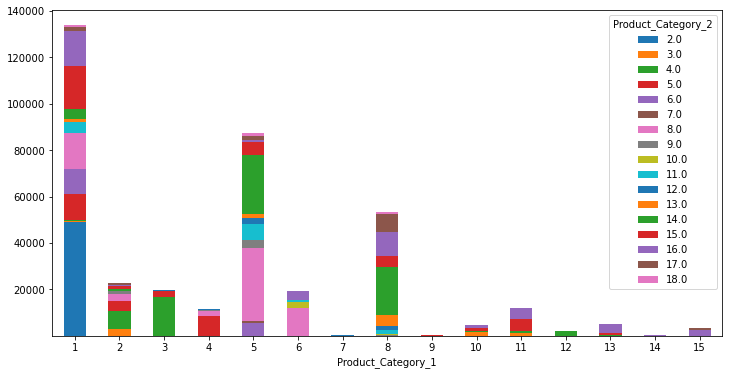

In [298]:
barplot=prod1_2.plot(kind='bar',stacked=True,rot=0)

In [299]:
prod1_3=pd.crosstab(index=df_sales['Product_Category_1'],columns=df_sales['Product_Category_3'])
prod1_3

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Product_Category_1,,,,,,,,,,,,,,,
1,613,643,7982,4890,8014,5621,0,1588,1091,2106,6429,21748,18567,9314,2536
2,0,1232,2022,0,2422,2679,989,0,438,0,1686,3451,567,0,823
3,0,0,6654,0,178,527,0,0,4707,0,0,0,396,0,0
4,0,0,0,0,1079,2115,0,0,1190,113,0,671,0,0,181
5,0,0,0,0,869,637,0,217,1820,601,8660,270,2621,2245,1071
6,0,0,0,0,0,0,737,0,0,2639,1104,871,3047,0,0
8,0,0,0,0,0,0,0,0,0,0,549,1002,2666,4833,18
10,0,0,0,0,0,0,0,0,0,0,0,0,1755,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,1961,0,0


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

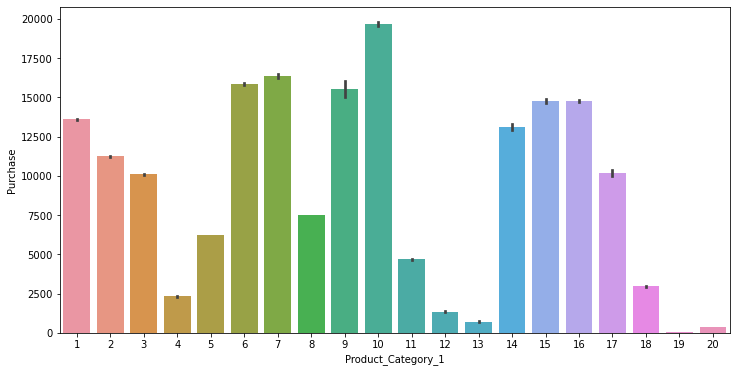

In [300]:
sns.barplot(x='Product_Category_1',y='Purchase',data=df_sales)

In [663]:
## Inference: Product 10 in Product category 1 has the maximum number of purchase

In [312]:
df_sales.groupby('Product_Category_1')['Purchase'].count()

Product_Category_1
1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Purchase, dtype: int64

# Product Category 2 with other variables

In [664]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [665]:
prod2_3=pd.crosstab(index=df_sales['Product_Category_2'],columns=df_sales['Product_Category_3'])
prod2_3

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Product_Category_2,,,,,,,,,,,,,,,
2.0,613,524,7982,1924,2800,4421,0,1588,0,1347,3545,14882,3490,200,218
3.0,0,1351,0,0,0,0,989,0,0,0,0,544,0,0,0
4.0,0,0,8676,0,1621,3730,0,0,4882,0,134,511,0,0,0
5.0,0,0,0,2966,3012,1046,0,0,2453,113,467,3001,396,495,1886
6.0,0,0,0,0,5129,637,0,217,0,1012,1426,1449,2267,0,0
8.0,0,0,0,0,0,1745,737,0,617,970,8720,1578,3524,7653,1403
9.0,0,0,0,0,0,0,0,0,91,0,1910,984,0,0,0
10.0,0,0,0,0,0,0,0,0,0,1581,0,0,680,0,0
11.0,0,0,0,0,0,0,0,0,1203,436,0,3181,974,0,0


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

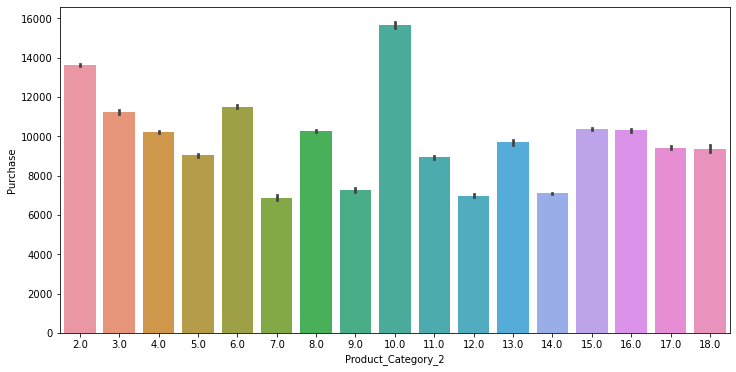

In [666]:
sns.barplot(x="Product_Category_2",y="Purchase",data=df_sales)

In [667]:
## Inference : Product 10 in Product category 2 has the maximum number of purchase

In [310]:
df_sales.groupby('Product_Category_2')['Purchase'].count()

Product_Category_2
2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
Name: Purchase, dtype: int64

# Product Category 3 with Purchase 

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

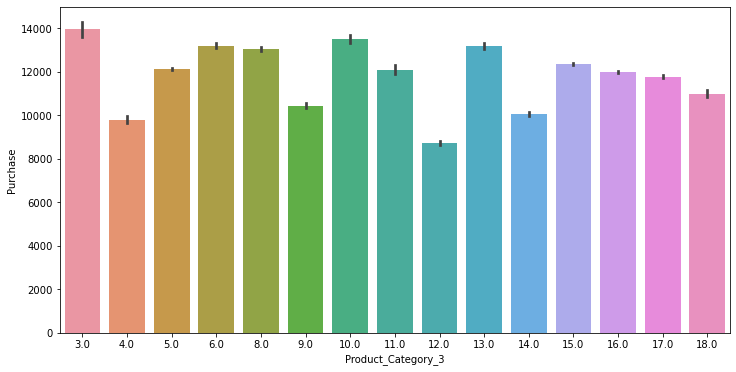

In [668]:
sns.barplot(x="Product_Category_3",y="Purchase",data=df_sales)

In [669]:
## Inference: Product 3 in Product category 3 has the maximum number of purchase

In [313]:
df_sales.groupby('Product_Category_3')['Purchase'].count()

Product_Category_3
3.0       613
4.0      1875
5.0     16658
6.0      4890
8.0     12562
9.0     11579
10.0     1726
11.0     1805
12.0     9246
13.0     5459
14.0    18428
15.0    28013
16.0    32636
17.0    16702
18.0     4629
Name: Purchase, dtype: int64

# Multivariate Analysis

In [670]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

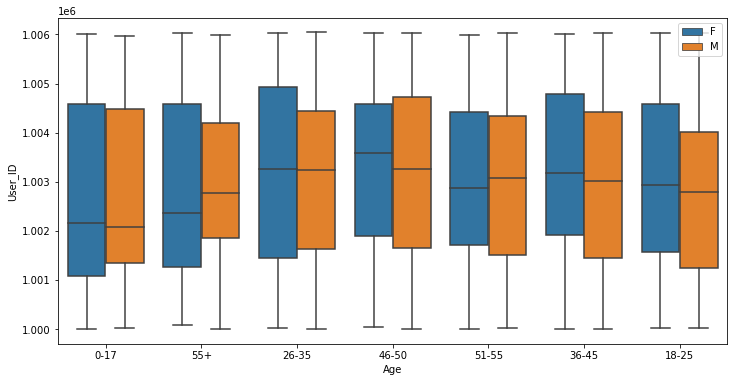

In [671]:
sns.boxplot(df_sales['Age'],df_sales['User_ID'],hue=df_sales['Gender'])
plt.legend(loc = 'upper right')

In [672]:
## Inference : Maximum female belongs to the age group of 26-35 which have the maximum number of user id
## Maximum male belongs to the age group of 46-50 which have the maximum number of user id

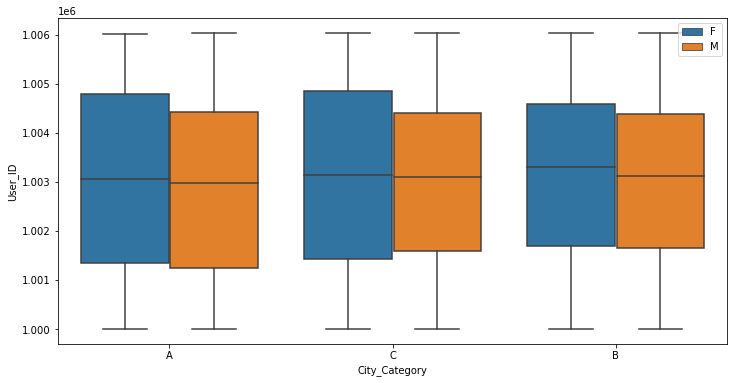

In [673]:
sns.boxplot(df_sales['City_Category'],df_sales['User_ID'],hue=df_sales['Gender'])
plt.legend(loc = 'upper right')

In [674]:
## In all the city category females have the maximum number of user id


<AxesSubplot:xlabel='Marital_Status', ylabel='User_ID'>

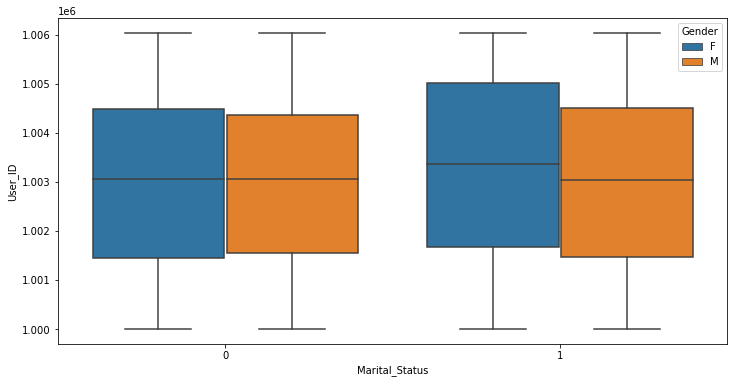

In [675]:
sns.boxplot(df_sales['Marital_Status'],df_sales['User_ID'],hue=df_sales['Gender'])

In [676]:
## Married females have more user id as compared to unmarried females

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='User_ID'>

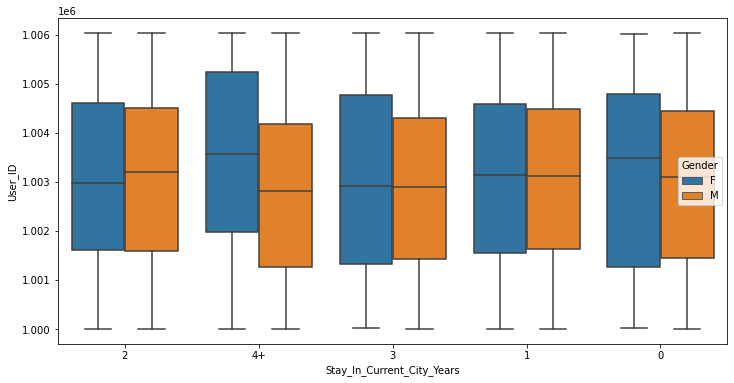

In [677]:
sns.boxplot(df_sales['Stay_In_Current_City_Years'],df_sales['User_ID'],hue=df_sales['Gender'])

In [678]:
## Range of female user id is more than male user id in all years

In [679]:
gender_Age = pd.crosstab(df_sales['Gender'],df_sales['Age'])

In [680]:
gender_Age

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Gender,,,,,,,
F,5083,24628,50752,27170,13199,9894,5083
M,10019,75032,168835,82843,32502,28607,16421


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

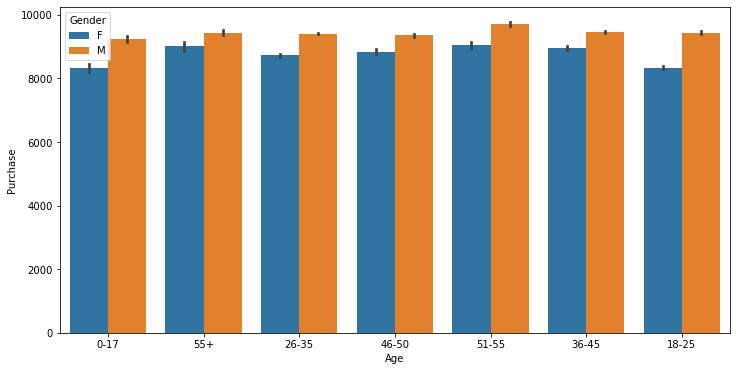

In [681]:
sns.barplot(df_sales['Age'],df_sales['Purchase'],hue=df_sales['Gender'])

In [682]:
## inference : Males are in the majority of purchase and in the age group of 51-55 maximum amount of purchase is done 

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

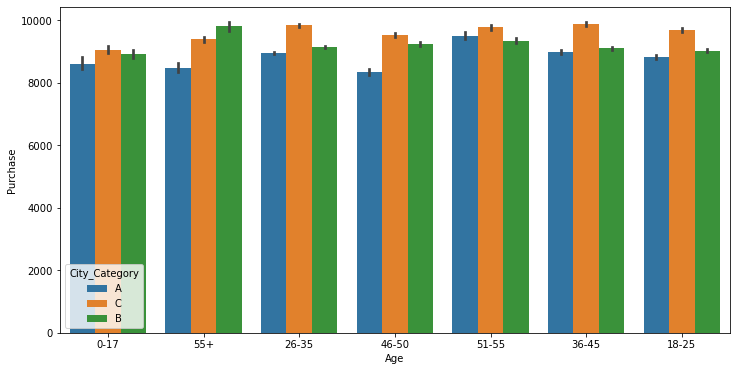

In [683]:
sns.barplot(df_sales['Age'],df_sales['Purchase'],hue=df_sales['City_Category'])

In [684]:
## Inference : Purchase distribution is shown w.r.t to age group and city_category.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

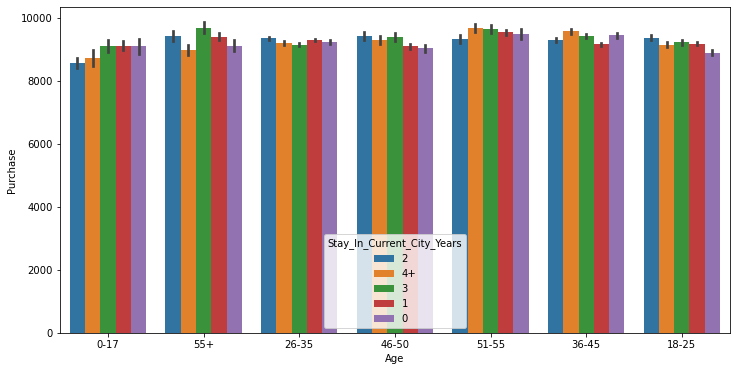

In [685]:
sns.barplot(df_sales['Age'],df_sales['Purchase'],hue=df_sales['Stay_In_Current_City_Years'])

In [686]:
## Inference : Purchase distribution is shown w.r.t to age group and Stay in current city years.

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

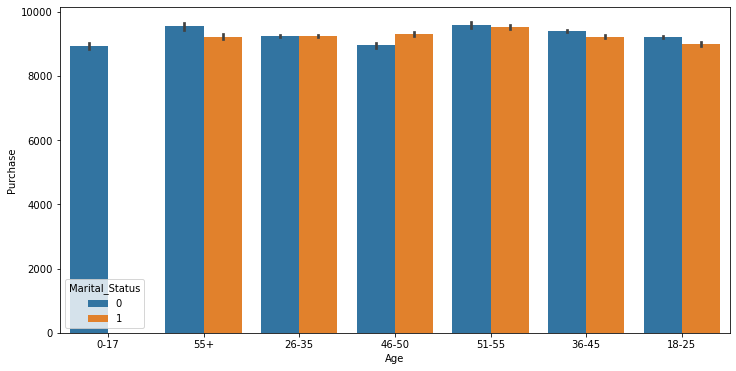

In [687]:
sns.barplot(df_sales['Age'],df_sales['Purchase'],hue=df_sales['Marital_Status'])

In [688]:
## Inference : Purchase distribution is shown w.r.t to age group and Marital Status

In [329]:
pd.pivot_table(df_sales,index= ['Gender'],columns=['Age'],values=['Purchase'],aggfunc='count')

Purchase                                           
Age        0-17  18-25   26-35  36-45  46-50  51-55    55+
Gender                                                    
F          5083  24628   50752  27170  13199   9894   5083
M         10019  75032  168835  82843  32502  28607  16421

In [689]:
df_sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

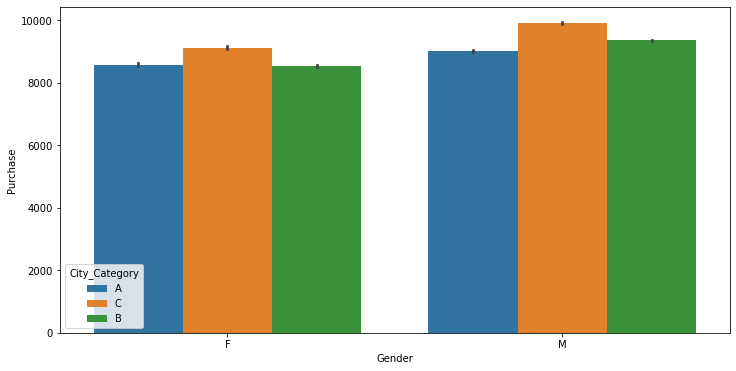

In [690]:
sns.barplot(df_sales['Gender'],df_sales['Purchase'],hue=df_sales['City_Category'])

In [691]:
## Infernce: For both male and female, those who belong to city category c has maximum purchase 

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

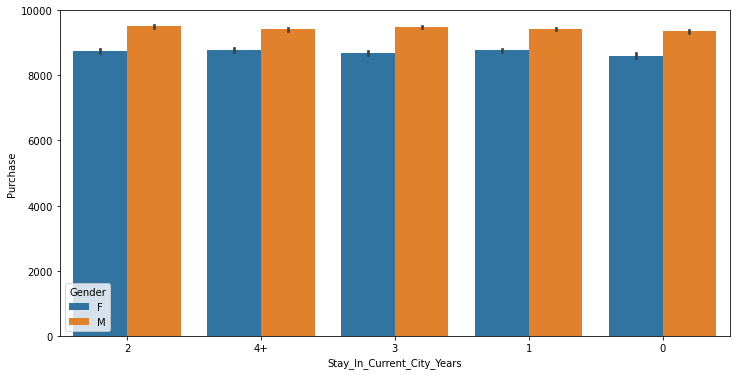

In [692]:
sns.barplot(df_sales['Stay_In_Current_City_Years'],df_sales['Purchase'],hue=df_sales['Gender'])

In [693]:
##Inference : Purchase distribution is shown w.r.t to Gender and Stay in current city years
## Almost all have the same purchase

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

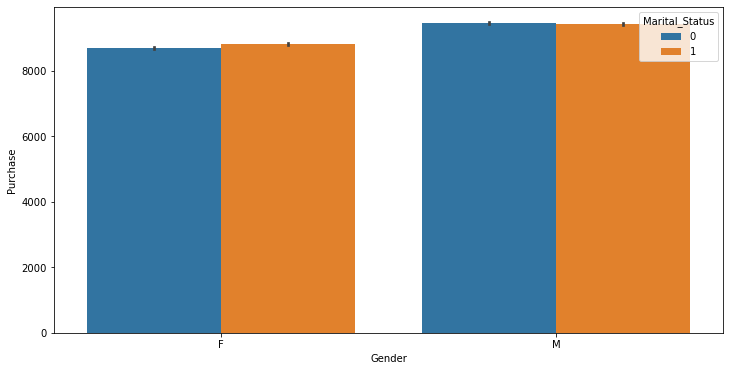

In [694]:
sns.barplot(df_sales['Gender'],df_sales['Purchase'],hue=df_sales['Marital_Status'])

In [695]:
##Inference : Both married and unmarried male have maximum amount of purchase

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

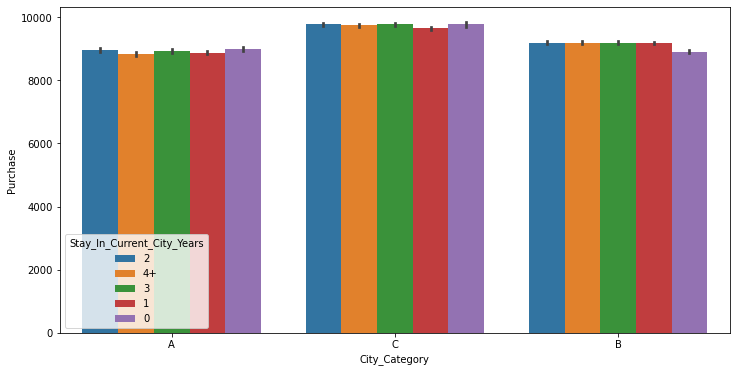

In [696]:
sns.barplot(df_sales['City_Category'],df_sales['Purchase'],hue=df_sales['Stay_In_Current_City_Years'])

In [697]:
## Inference : City Category C has the maximum amount of purchase as compared to A and B ,
#              irrespective of staying in current city years

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

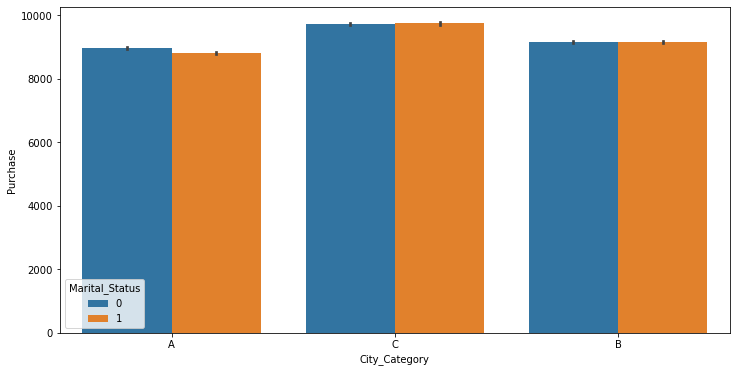

In [698]:
sns.barplot(df_sales['City_Category'],df_sales['Purchase'],hue=df_sales['Marital_Status'])

In [699]:
## Both married and unmarried people who belongs to city category c has the maximum purchase

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

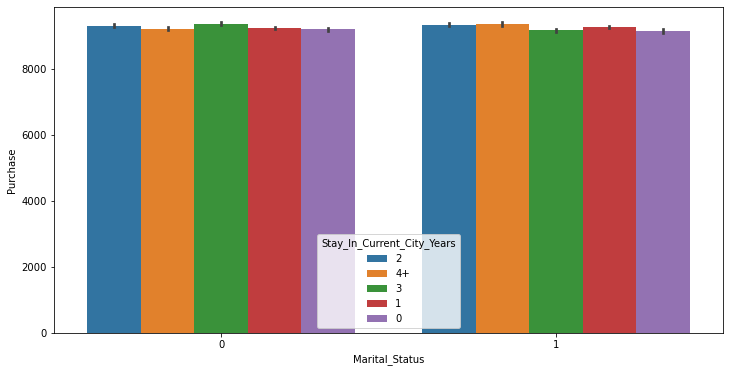

In [700]:
sns.barplot(df_sales['Marital_Status'],df_sales['Purchase'],hue=df_sales['Stay_In_Current_City_Years'])

In [701]:
## Inference : All almost have the same purchase irrespective of the Marital status and stay in current city years